# Daten

Alle Daten kommen vom Worldbank Databank:
https://databank.worldbank.org/source/world-development-indicators.

Die Daten sind in 4 Gruppen (Dateien) verteilt:
- Low income countries
- Lower middle income countries
- Upper middle income countries
- High income countries

Daten wurden erst in Excel in einheitliche Tabellen zusammengeführt und fehlende Daten wurden entfernt. Dabei jedes Land hat vollständige Daten für einen bestimmten Indikator für ganzes Zeitraum (2010-2023). Es kommt aber vor, dass ein Land Daten nicht für jeden Indikator hat. Weiter in diesem Notebook werden die Daten auf Ausreisser gefiltert.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


## 'Low income countries' Datensatz

In [2]:
df = pd.read_excel('low_income.xls')
df.head()

,Country Name,Country Code,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
0,Burkina Faso,BFA,2010,9.088720e+09,20.515849,28.557390,71.593579,14.457528,0.384492,100.000000,3.723,NaN
1,Burkina Faso,BFA,2011,9.690627e+09,26.195501,31.301753,68.696115,14.286625,1.190745,102.759767,3.827,NaN
2,Burkina Faso,BFA,2012,1.031593e+10,26.598085,34.640523,69.134862,14.254582,2.621460,106.683292,3.856,NaN
3,Burkina Faso,BFA,2013,1.091349e+10,27.076985,36.958866,71.516379,14.655586,3.647668,107.252702,4.055,NaN
4,Burkina Faso,BFA,2014,1.138570e+10,26.932004,31.891558,70.222526,15.474779,2.562552,106.975894,4.251,NaN


In [3]:
df.set_index('Country Code', inplace=True)

##### Da Daten für 'Export', 'Import', 'Private consumption', 'Government consumption' and 'FDI inflows' als % von GDP gegeben sind, werden genaue Werte ausgerechnet durch:

Indicator * GDP / 100

In [4]:
for i in df.columns[3:8]:
    df[i] = df['GDP'] * df[i]/100
df.head()

,Country Name,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
Country Code,,,,,,,,,,,
BFA,Burkina Faso,2010,9.088720e+09,1.864628e+09,2.595501e+09,6.506940e+09,1.314004e+09,3.494542e+07,100.000000,3.723,NaN
BFA,Burkina Faso,2011,9.690627e+09,2.538508e+09,3.033336e+09,6.657084e+09,1.384464e+09,1.153906e+08,102.759767,3.827,NaN
BFA,Burkina Faso,2012,1.031593e+10,2.743840e+09,3.573492e+09,7.131905e+09,1.470493e+09,2.704280e+08,106.683292,3.856,NaN
BFA,Burkina Faso,2013,1.091349e+10,2.955044e+09,4.033502e+09,7.804933e+09,1.599436e+09,3.980879e+08,107.252702,4.055,NaN
BFA,Burkina Faso,2014,1.138570e+10,3.066397e+09,3.631077e+09,7.995326e+09,1.761912e+09,2.917644e+08,106.975894,4.251,NaN


##### Heatmap zeigt Datenvollständigkeit und mit Rot sind fehlende Daten markiert.

<Axes: ylabel='Country Code'>

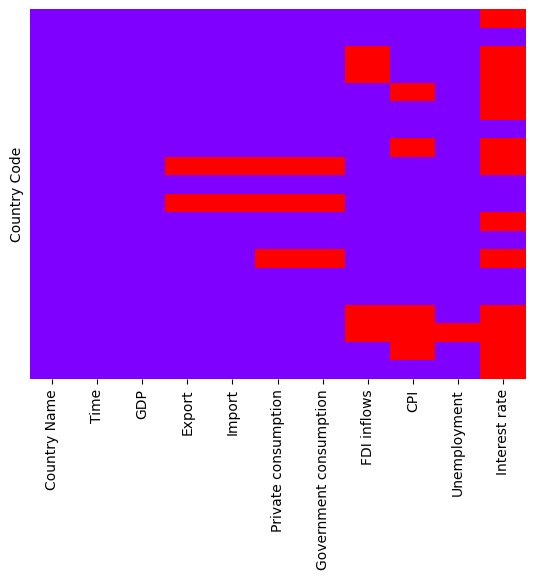

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='rainbow')

## Ausreisser werden entfernt.

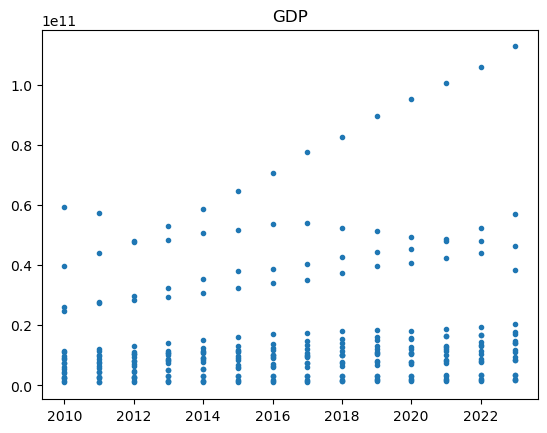

In [6]:
variable = 'GDP'
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [7]:
df[df[variable]>21000000000].index.unique()

Index(['COD', 'ETH', 'SDN', 'UGA'], dtype='object', name='Country Code')

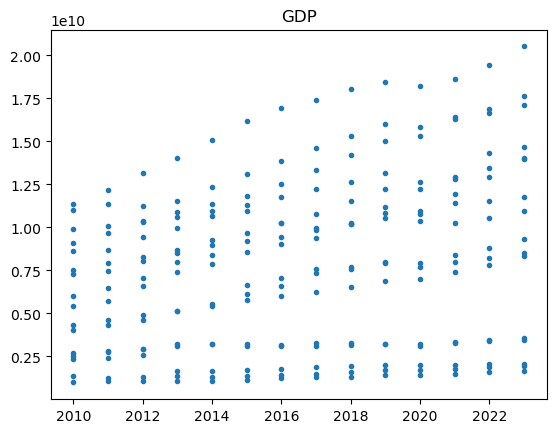

In [8]:
for i in ['COD', 'ETH', 'SDN', 'UGA']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()


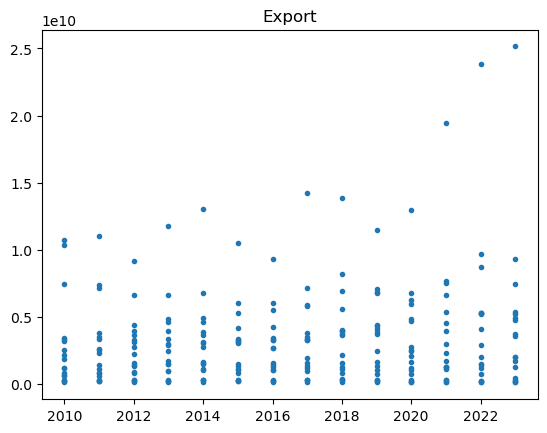

In [9]:
variable = 'Export'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [10]:
df[df[variable]>6000000000].index.unique()

Index(['COD', 'ETH', 'MOZ', 'SDN', 'UGA'], dtype='object', name='Country Code')

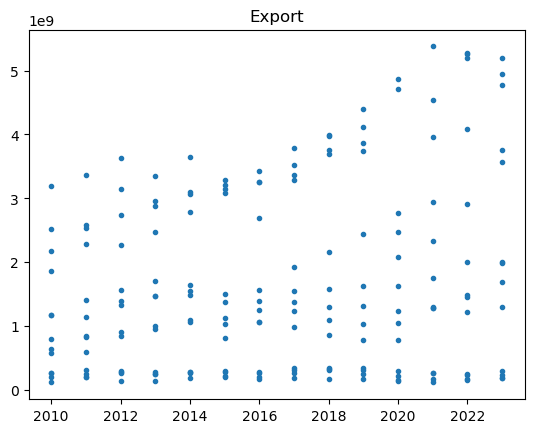

In [11]:
for i in ['COD', 'SDN', 'ETH', 'MOZ', 'UGA']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

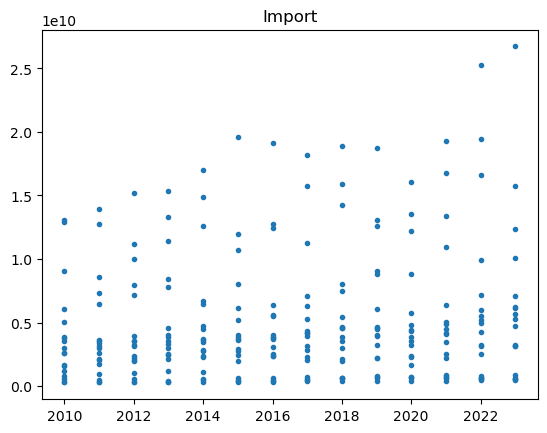

In [12]:
variable = 'Import'
 
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()


In [13]:
df[df[variable]>8000000000].index.unique()

Index(['COD', 'ETH', 'MOZ', 'SDN', 'UGA'], dtype='object', name='Country Code')

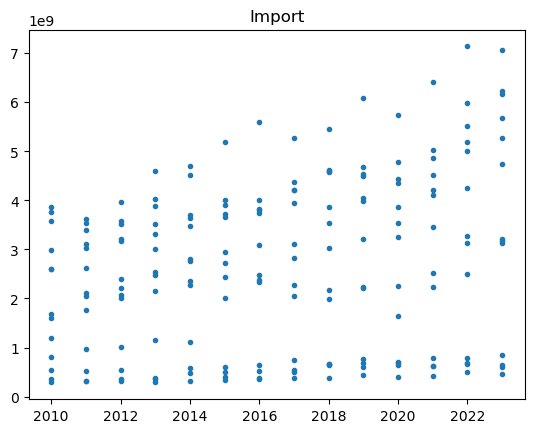

In [14]:
for i in ['COD', 'ETH', 'MOZ', 'UGA', 'SDN']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

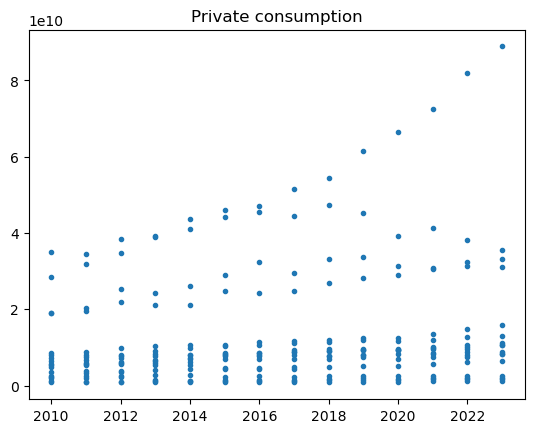

In [15]:
variable = 'Private consumption'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [16]:
df[df[variable]>20000000000].index.unique()

Index(['COD', 'ETH', 'SDN', 'UGA'], dtype='object', name='Country Code')

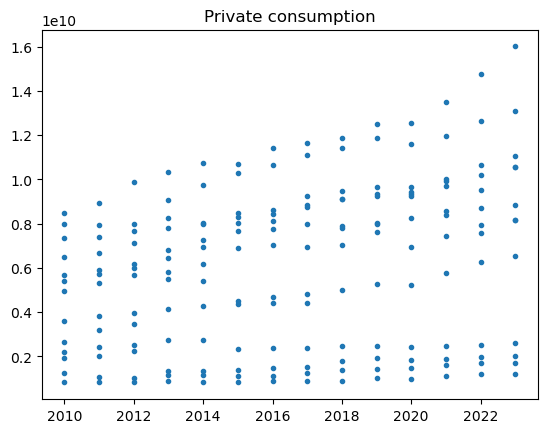

In [17]:
for i in ['COD', 'ETH', 'SDN', 'UGA']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

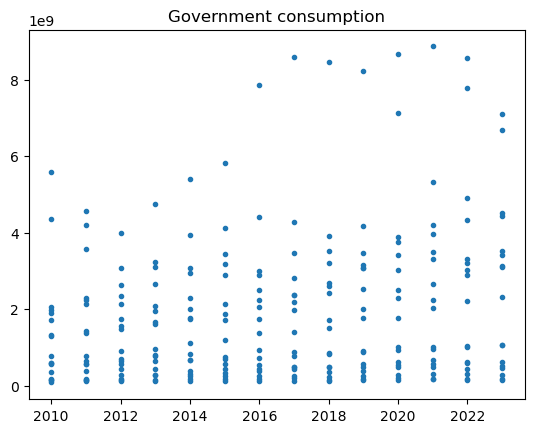

In [18]:
variable = 'Government consumption'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [19]:
df[df[variable]>4000000000].index.unique()

Index(['COD', 'ETH', 'MOZ', 'SDN', 'UGA'], dtype='object', name='Country Code')

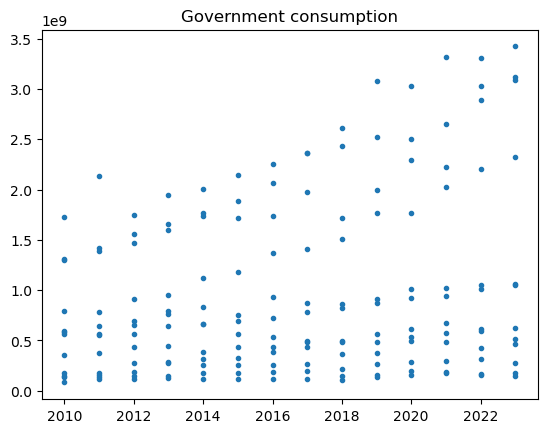

In [20]:
for i in ['ETH', 'SDN', 'COD', 'MOZ', 'UGA']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

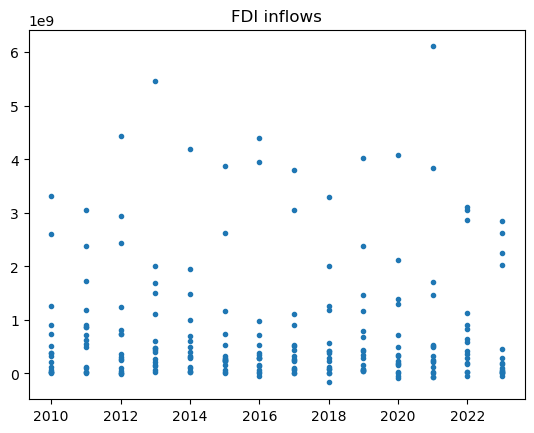

In [21]:
variable = 'FDI inflows'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [22]:
df[df[variable]>2000000000].index.unique()

Index(['COD', 'ETH', 'LBR', 'MOZ', 'UGA'], dtype='object', name='Country Code')

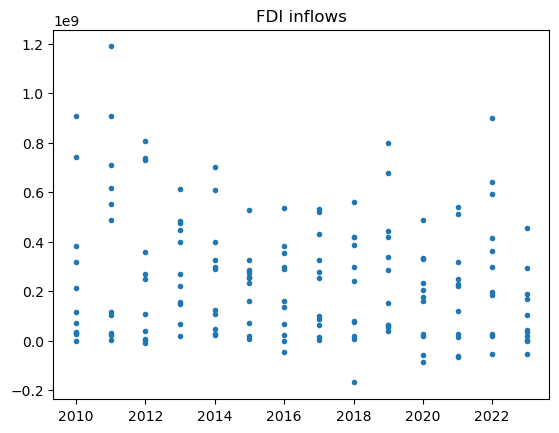

In [23]:
for i in ['COD', 'ETH', 'MOZ', 'LBR', 'UGA']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

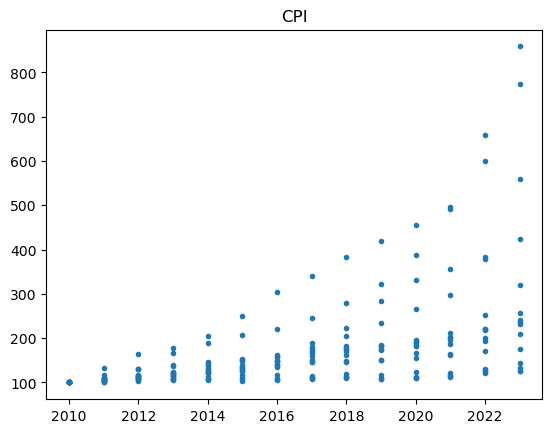

In [24]:
variable = 'CPI'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [25]:
df[df[variable]>300].index.unique()

Index(['BDI', 'ETH', 'LBR', 'MWI', 'SLE'], dtype='object', name='Country Code')

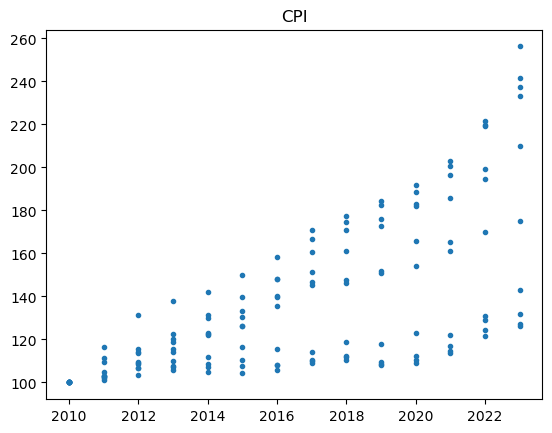

In [26]:
for i in ['ETH', 'MWI', 'SLE', 'BDI', 'LBR']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

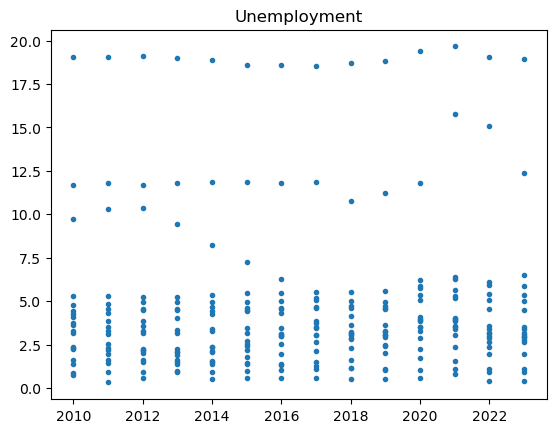

In [27]:
variable = 'Unemployment'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [28]:
df[df[variable]>7].index.unique()

Index(['GMB', 'RWA', 'SOM'], dtype='object', name='Country Code')

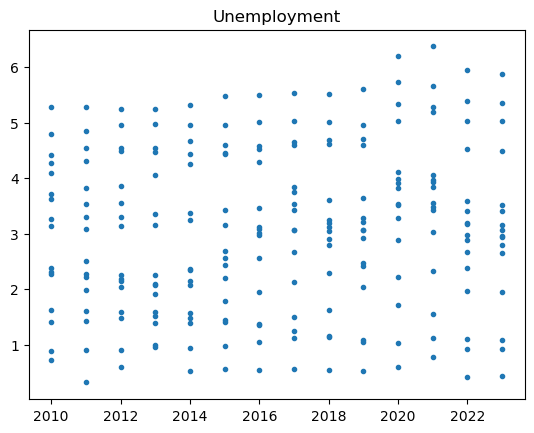

In [29]:
for i in ['GMB', 'RWA', 'SOM']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

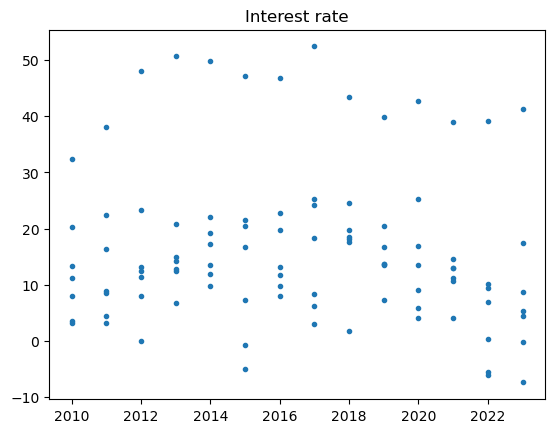

In [30]:
variable = 'Interest rate'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [31]:
df[df[variable]>30].index.unique()

Index(['MDG'], dtype='object', name='Country Code')

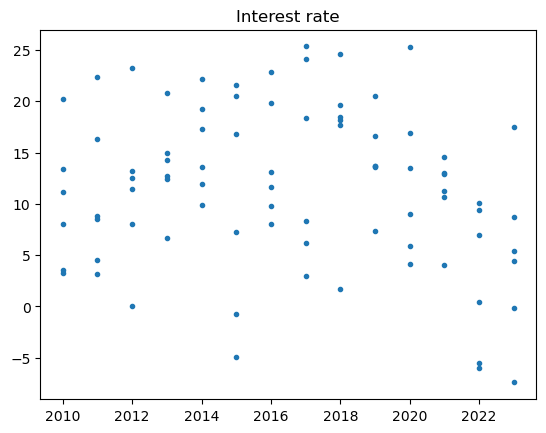

In [32]:
for i in ['MDG']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

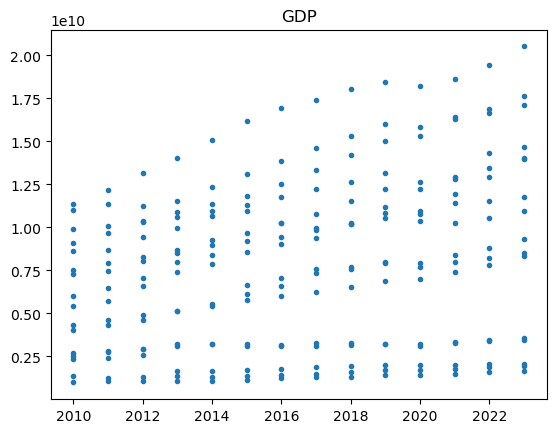

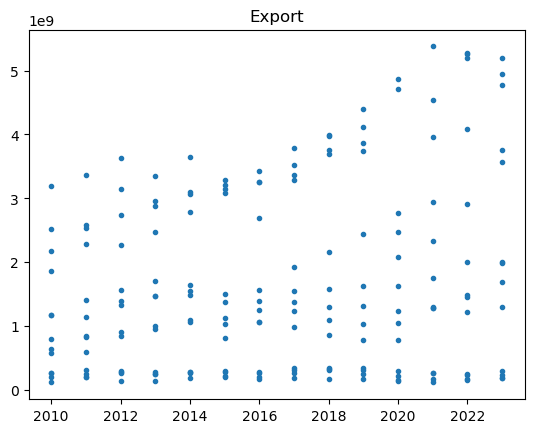

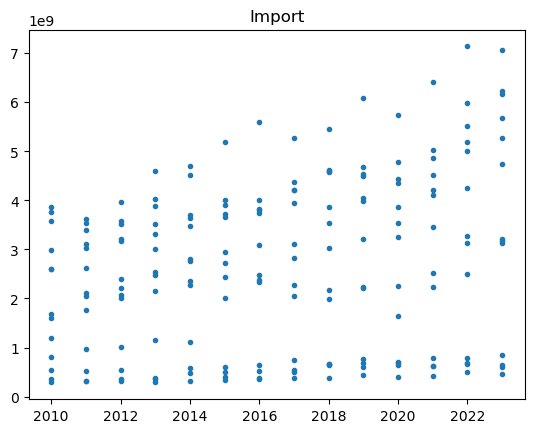

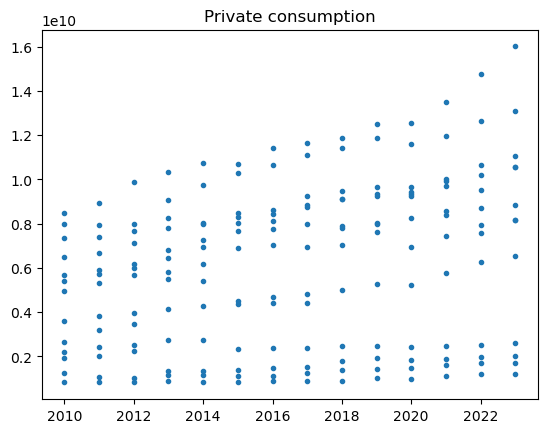

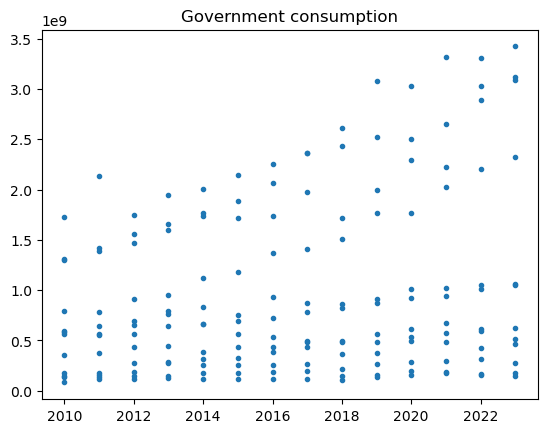

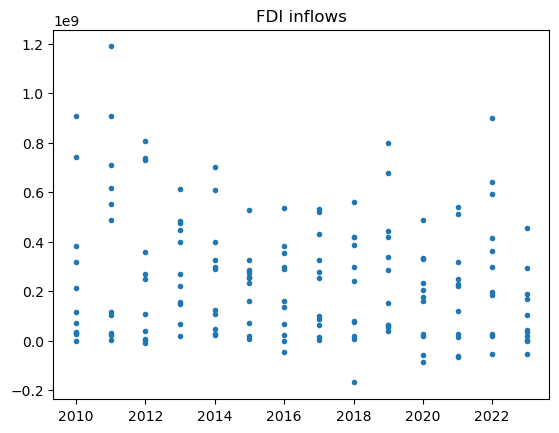

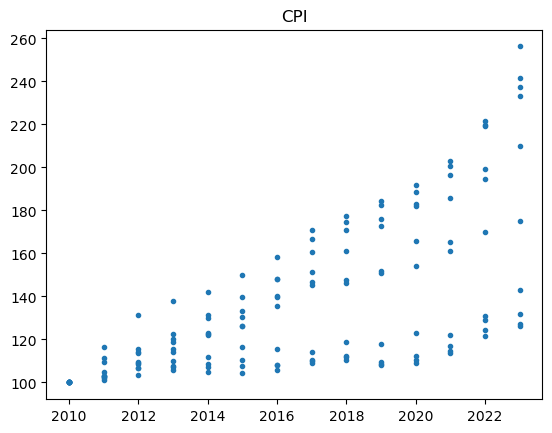

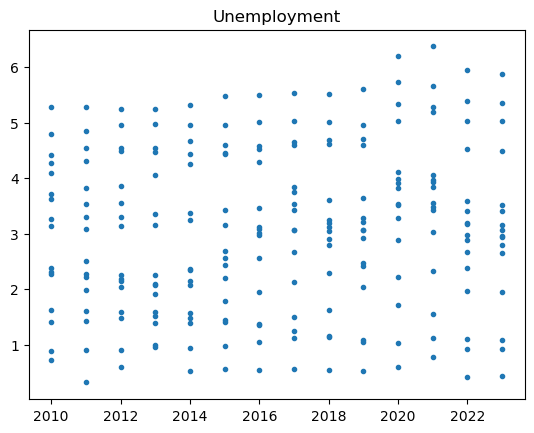

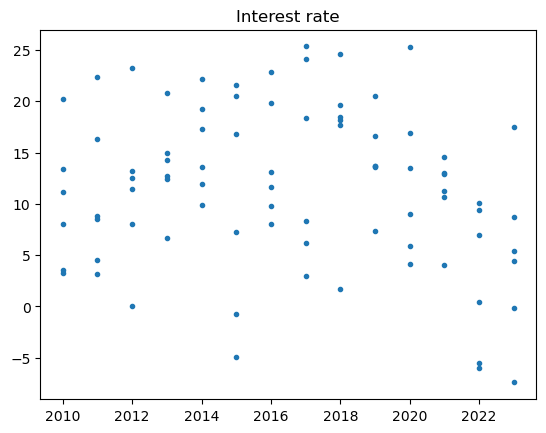

In [33]:
for i in df.columns[2:]:
    plt.scatter(x=df['Time'], y=df[i], marker='.')
    plt.title(i)
    plt.show()

#### Der behandelte Datensatz wird gespeichert.

In [34]:
df_low = df.copy()
df_low.to_csv('df_low.csv')
print('df_low saved')

df_low saved


## 'Lower middle income countries' Datensatz

In [35]:
df = pd.read_excel('lower_middle_income.xls')
df.head()

,Country Name,Country Code,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
0,Angola,AGO,2010,7.255630e+10,61.543116,42.580519,35.797753,17.042346,-3.851111,100.000000,16.618,-7.353793
1,Angola,AGO,2011,7.507549e+10,60.669948,39.312559,33.982399,18.235859,-2.704873,113.482468,16.770,-9.876357
2,Angola,AGO,2012,8.148852e+10,55.940131,35.859967,35.409625,17.842633,-1.143768,125.146088,16.562,8.764706
3,Angola,AGO,2013,8.552596e+10,50.747086,36.064847,37.552842,21.621949,-5.380131,136.131179,16.492,12.610802
4,Angola,AGO,2014,8.965050e+10,44.695029,34.637893,44.466746,17.975659,2.690006,146.042056,16.406,12.380530


In [36]:
df.set_index('Country Code', inplace=True)

In [37]:
for i in df.columns[3:8]:
    df[i] = df['GDP'] * df[i]/100
df.head()

,Country Name,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
Country Code,,,,,,,,,,,
AGO,Angola,2010,7.255630e+10,4.465341e+10,3.089485e+10,2.597353e+10,1.236530e+10,-2.794224e+09,100.000000,16.618,-7.353793
AGO,Angola,2011,7.507549e+10,4.554826e+10,2.951410e+10,2.551245e+10,1.369066e+10,-2.030697e+09,113.482468,16.770,-9.876357
AGO,Angola,2012,8.148852e+10,4.558479e+10,2.922176e+10,2.885478e+10,1.453970e+10,-9.320395e+08,125.146088,16.562,8.764706
AGO,Angola,2013,8.552596e+10,4.340193e+10,3.084481e+10,3.211743e+10,1.849238e+10,-4.601409e+09,136.131179,16.492,12.610802
AGO,Angola,2014,8.965050e+10,4.006932e+10,3.105305e+10,3.986466e+10,1.611527e+10,2.411604e+09,146.042056,16.406,12.380530


<Axes: ylabel='Country Code'>

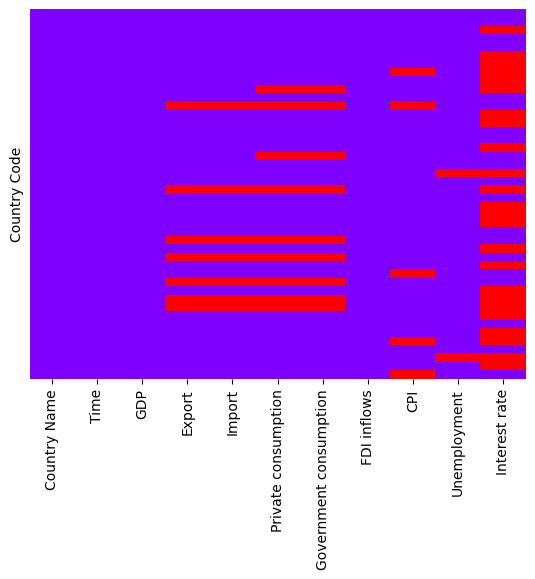

In [38]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='rainbow')

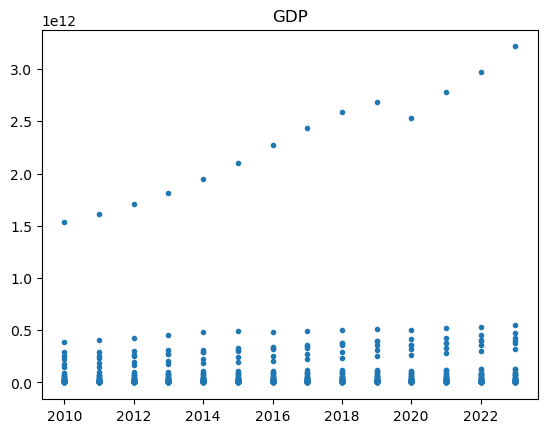

In [39]:
variable = 'GDP'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [40]:
df[df[variable]>60000000000].index.unique()

Index(['AGO', 'BGD', 'CIV', 'EGY', 'GHA', 'IND', 'KEN', 'MAR', 'NGA', 'PAK',
       'PHL', 'LKA', 'TZA', 'UZB', 'VNM'],
      dtype='object', name='Country Code')

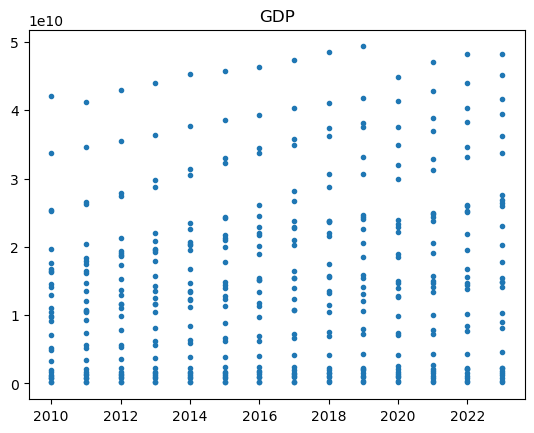

In [41]:
for i in ['IND', 'BGD', 'EGY', 'NGA', 'PAK', 'PHL', 'VNM', 'AGO', 'KEN', 'MAR', 'LKA', 'UZB', 'CIV', 'GHA', 'TZA']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()


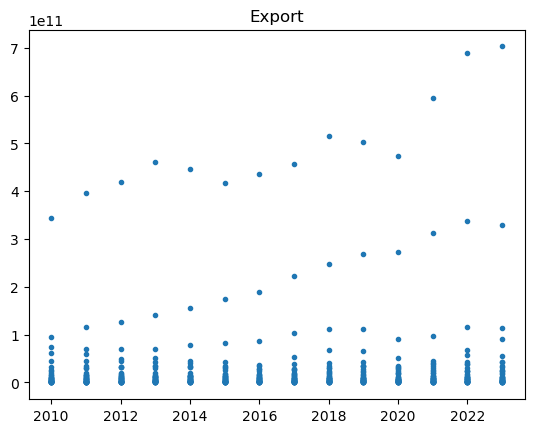

In [42]:
variable = 'Export'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [43]:
df[df[variable]>25000000000].index.unique()

Index(['AGO', 'BGD', 'EGY', 'IND', 'MAR', 'PAK', 'PHL', 'TUN', 'UZB', 'VNM'], dtype='object', name='Country Code')

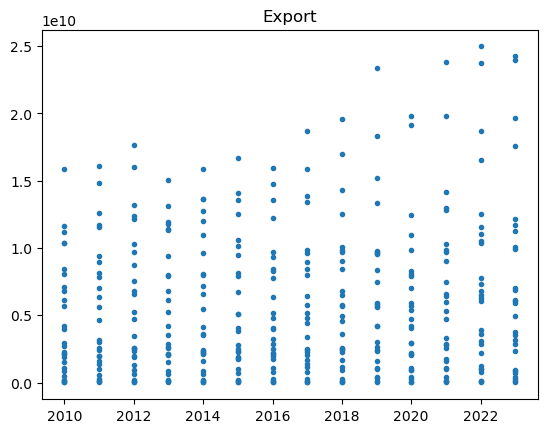

In [44]:
for i in ['IND', 'VNM', 'EGY', 'PHL', 'MAR', 'AGO', 'BGD', 'PAK', 'TUN', 'UZB']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

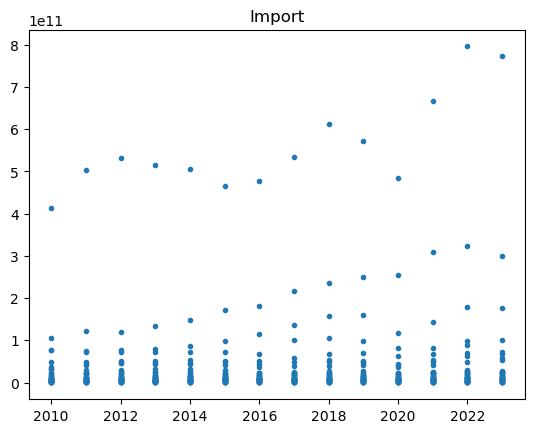

In [45]:
variable = 'Import'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()


In [46]:
df[df[variable]>40000000000].index.unique()

Index(['BGD', 'EGY', 'IND', 'MAR', 'PAK', 'PHL', 'UZB', 'VNM'], dtype='object', name='Country Code')

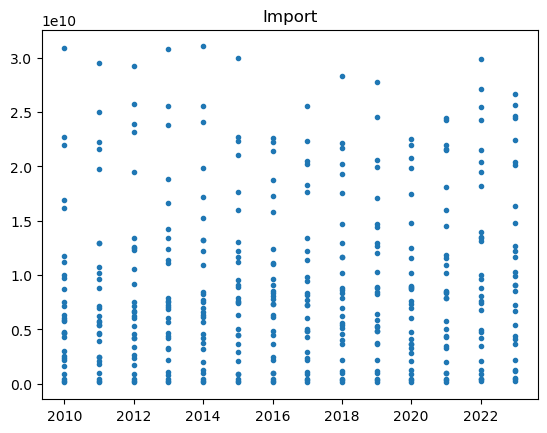

In [47]:
for i in ['EGY', 'IND', 'PHL', 'VNM', 'BGD', 'MAR', 'PAK', 'UZB']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

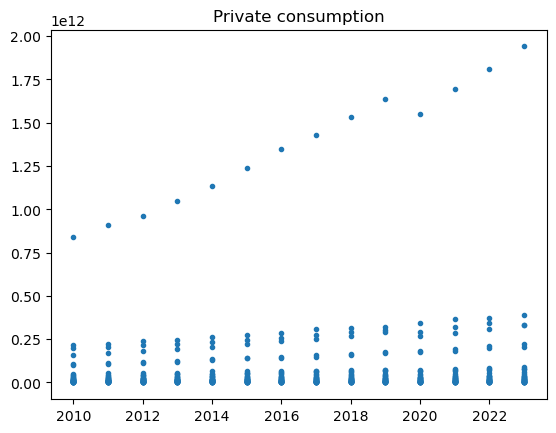

In [48]:
variable = 'Private consumption'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [49]:
df[df[variable]>100000000000].index.unique()

Index(['BGD', 'EGY', 'IND', 'PAK', 'PHL', 'VNM'], dtype='object', name='Country Code')

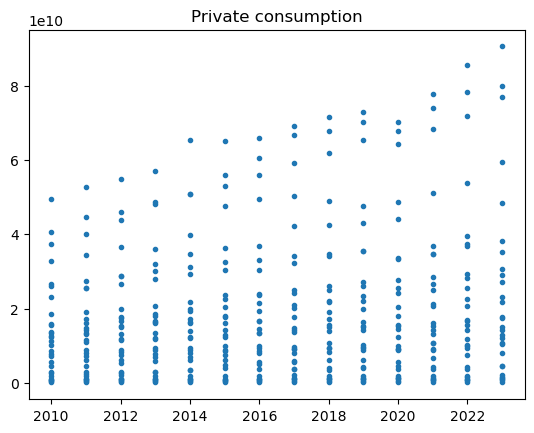

In [50]:
for i in ['IND', 'BGD', 'EGY', 'PAK', 'PHL', 'VNM']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

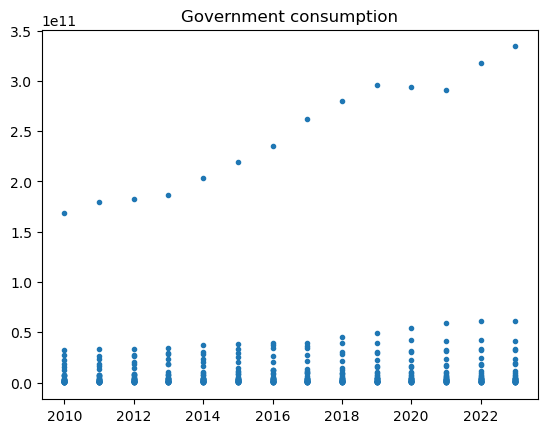

In [51]:
variable = 'Government consumption'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [52]:
df[df[variable]>7000000000].index.unique()

Index(['AGO', 'BGD', 'BOL', 'EGY', 'IND', 'KEN', 'MAR', 'PAK', 'PHL', 'TUN',
       'UZB', 'VNM'],
      dtype='object', name='Country Code')

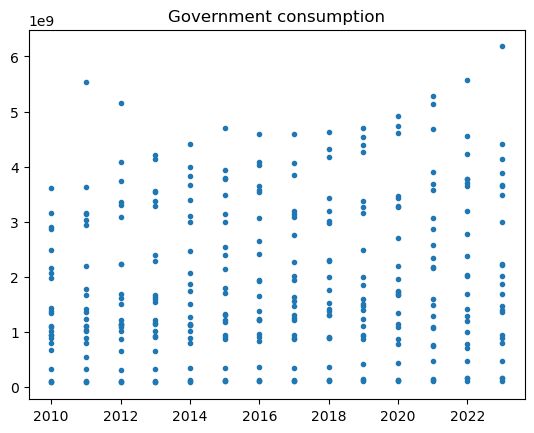

In [53]:
for i in ['IND', 'PHL', 'EGY', 'MAR', 'PAK', 'VNM', 'AGO', 'BGD', 'UZB', 'KEN', 'TUN', 'BOL']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

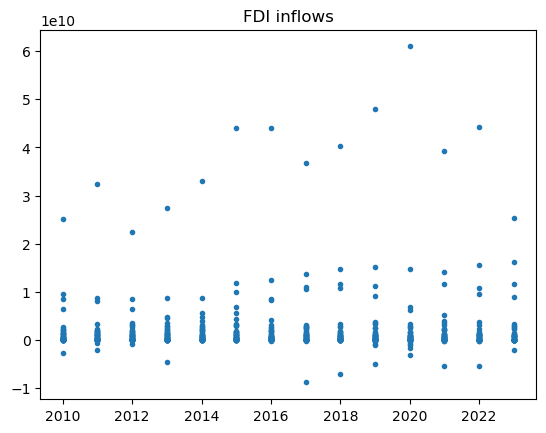

In [54]:
variable = 'FDI inflows'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [55]:
df[df[variable]>2500000000].index.unique()

Index(['AGO', 'BGD', 'KHM', 'COG', 'EGY', 'GHA', 'IND', 'MAR', 'NGA', 'PAK',
       'PHL', 'UZB', 'VNM'],
      dtype='object', name='Country Code')

In [56]:
df[df[variable]<-500000000].index.unique()

Index(['AGO', 'BOL', 'COG', 'EGY', 'MRT', 'TLS'], dtype='object', name='Country Code')

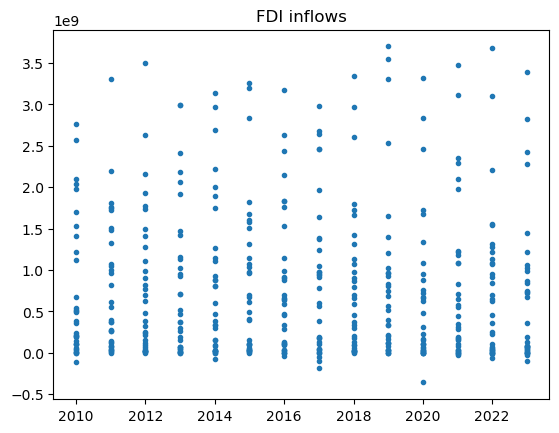

In [57]:
for i in ['IND', 'AGO', 'EGY', 'PHL', 'VNM', 'NGA', 'BOL', 'COG', 'MRT', 'TLS']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

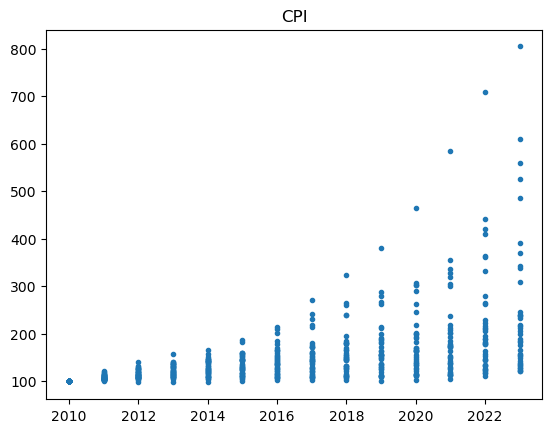

In [58]:
variable = 'CPI'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [59]:
df[df[variable]>300].index.unique()

Index(['AGO', 'EGY', 'GHA', 'GIN', 'HTI', 'NGA', 'PAK', 'STP', 'LKA', 'ZMB'], dtype='object', name='Country Code')

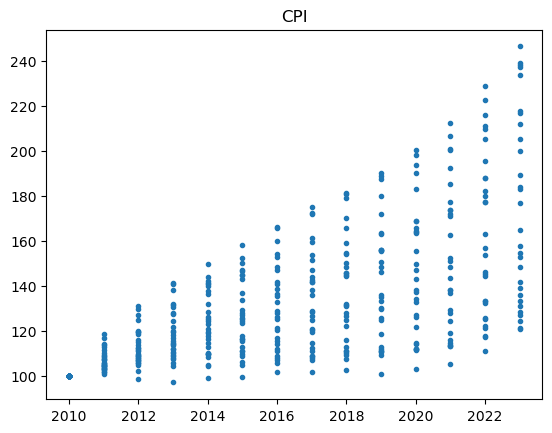

In [60]:
for i in ['AGO', 'GHA', 'HTI', 'NGA', 'EGY', 'GIN', 'PAK', 'STP', 'LKA', 'ZMB']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

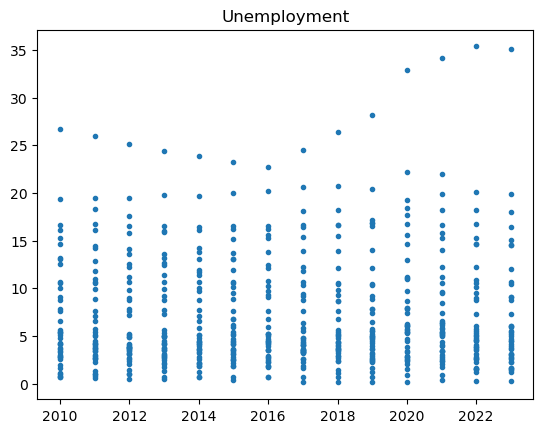

In [61]:
variable = 'Unemployment'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [62]:
df[df[variable]>20].index.unique()

Index(['COG', 'SWZ'], dtype='object', name='Country Code')

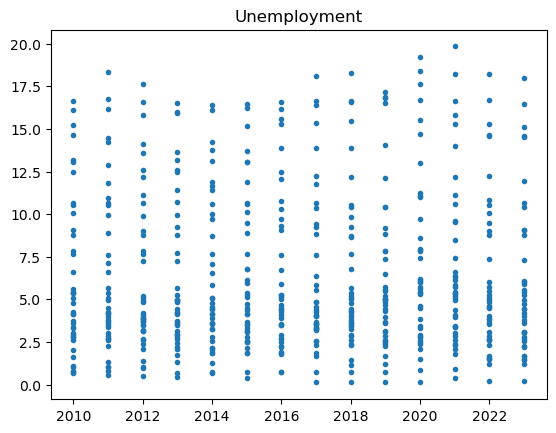

In [63]:
for i in ['COG', 'SWZ']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

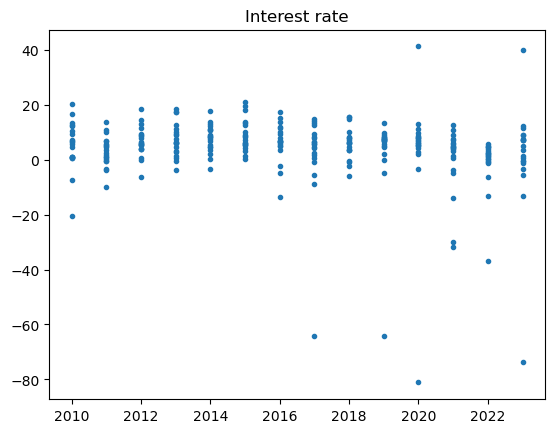

In [64]:
variable = 'Interest rate'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [65]:
df[df[variable]>25].index.unique()

Index(['TLS'], dtype='object', name='Country Code')

In [66]:
df[df[variable]<-5].index.unique()

Index(['AGO', 'BGD', 'EGY', 'HTI', 'PNG', 'TLS', 'VNM', 'ZWE'], dtype='object', name='Country Code')

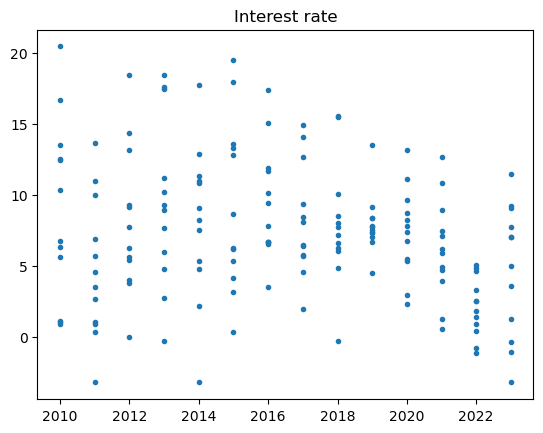

In [67]:
for i in ['TLS', 'VNM', 'ZWE', 'AGO', 'BGD', 'HTI', 'EGY', 'PNG']:
    df.loc[i, variable]= np.nan
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

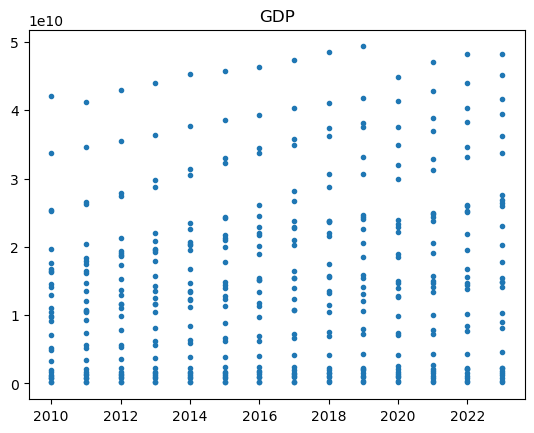

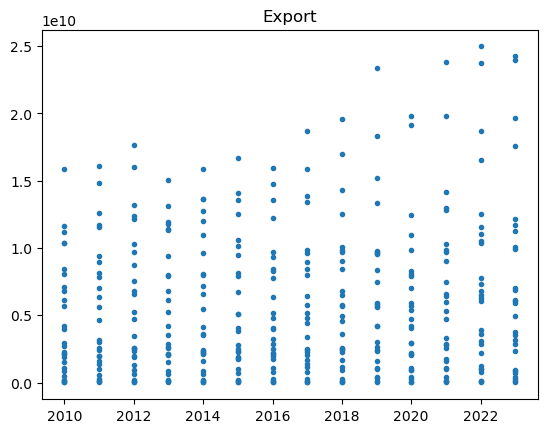

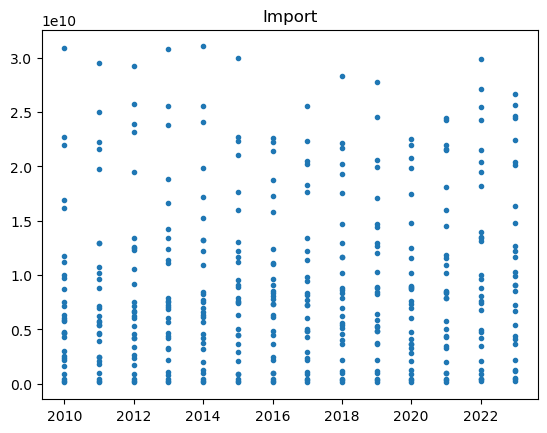

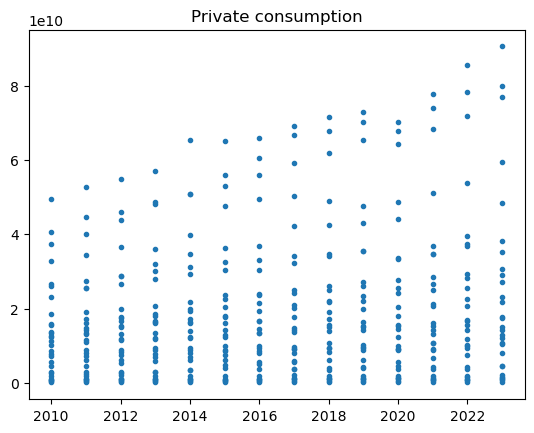

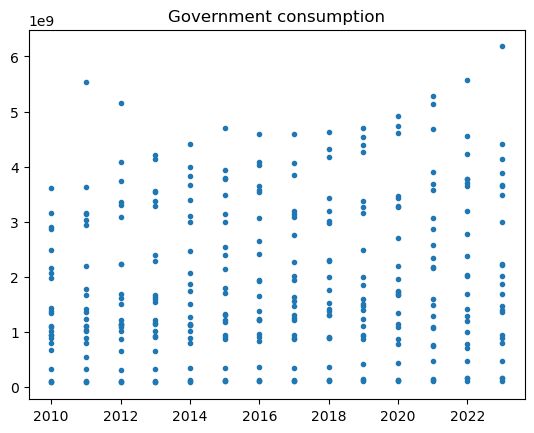

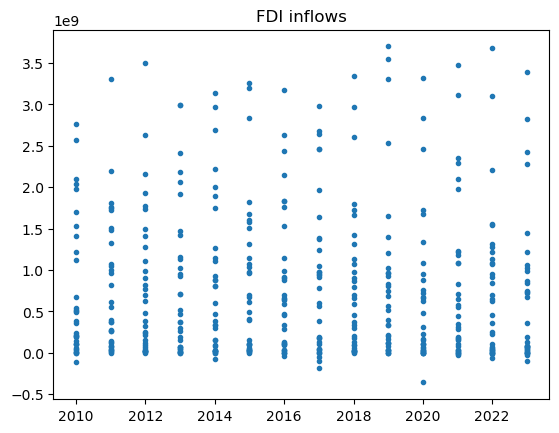

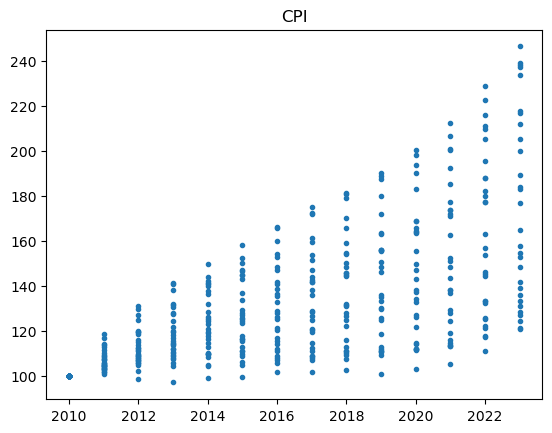

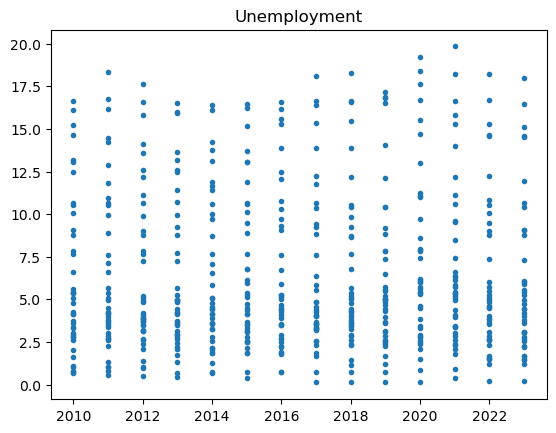

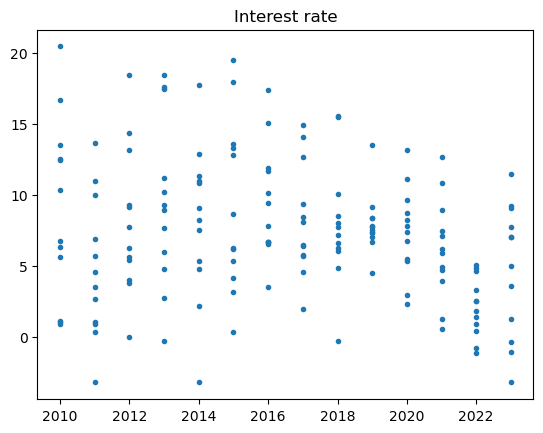

In [68]:
for i in df.columns[2:]:
    plt.scatter(x=df['Time'], y=df[i], marker='.')
    plt.title(i)
    plt.show()

#### Der behandelte Datensatz wird gespeichert.

In [69]:
df_lower_middle = df.copy()
df_lower_middle.to_csv('df_lower_middle.csv')
print('df_lower_middle saved')

df_lower_middle saved


## 'Upper middle income countries' Datensatz

In [70]:
df = pd.read_excel('upper_middle_income.xls')
df.head()

,Country Name,Country Code,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
0,Albania,ALB,2010,1.042021e+10,27.979435,48.563955,78.109337,11.157360,9.138131,100.000000,14.086,7.971037
1,Albania,ALB,2011,1.068545e+10,29.241537,51.977032,78.299435,10.974165,8.135336,103.429123,13.481,9.888462
2,Albania,ALB,2012,1.083688e+10,28.937488,47.572713,77.966881,10.844816,7.451355,105.530382,13.376,9.736112
3,Albania,ALB,2013,1.094547e+10,28.916315,46.957399,80.029374,11.025494,9.816285,107.575160,15.866,9.510397
4,Albania,ALB,2014,1.113969e+10,28.213001,47.194844,80.787355,11.451868,8.693039,109.324187,18.055,6.324558


In [71]:
df.set_index('Country Code', inplace=True)

In [72]:
for i in df.columns[3:8]:
    df[i] = df['GDP'] * df[i]/100
df.head()

,Country Name,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
Country Code,,,,,,,,,,,
ALB,Albania,2010,1.042021e+10,2.915516e+09,5.060466e+09,8.139156e+09,1.162620e+09,9.522124e+08,100.000000,14.086,7.971037
ALB,Albania,2011,1.068545e+10,3.124589e+09,5.553978e+09,8.366644e+09,1.172639e+09,8.692969e+08,103.429123,13.481,9.888462
ALB,Albania,2012,1.083688e+10,3.135922e+09,5.155400e+09,8.449181e+09,1.175240e+09,8.074947e+08,105.530382,13.376,9.736112
ALB,Albania,2013,1.094547e+10,3.165027e+09,5.139709e+09,8.759593e+09,1.206792e+09,1.074439e+09,107.575160,15.866,9.510397
ALB,Albania,2014,1.113969e+10,3.142842e+09,5.257361e+09,8.999464e+09,1.275703e+09,9.683779e+08,109.324187,18.055,6.324558


<Axes: ylabel='Country Code'>

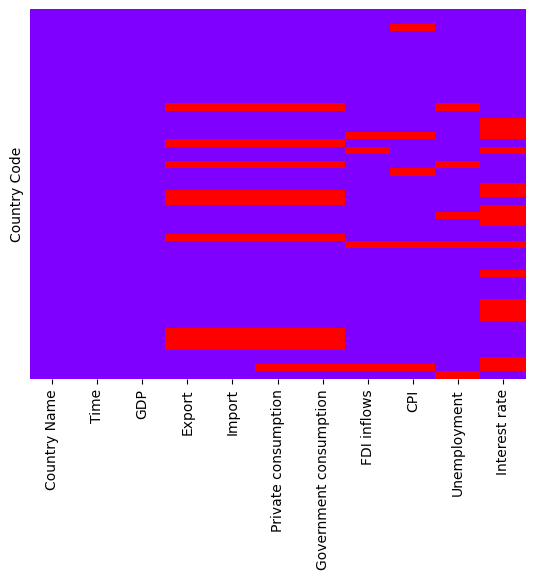

In [73]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='rainbow')

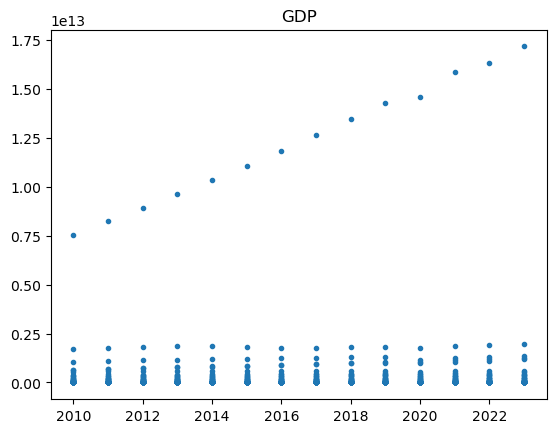

In [74]:
variable = 'GDP'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [75]:
df[df[variable]>25000000000].index.unique()

Index(['DZA', 'ARG', 'AZE', 'BLR', 'BRA', 'CHN', 'COL', 'CRI', 'DOM', 'ECU',
       'SLV', 'GTM', 'IDN', 'IRN', 'IRQ', 'KAZ', 'LBY', 'MYS', 'MEX', 'PRY',
       'PER', 'SRB', 'ZAF', 'THA', 'TUR', 'TKM', 'UKR'],
      dtype='object', name='Country Code')

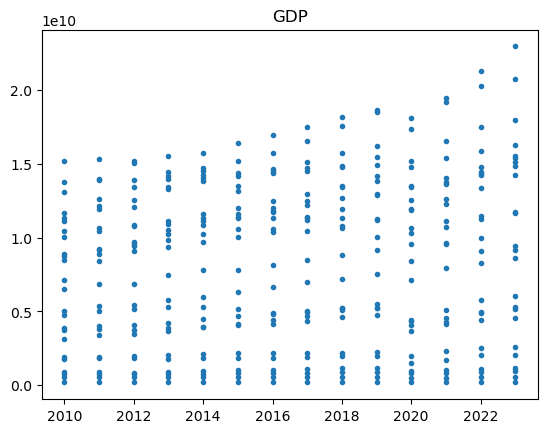

In [76]:
for i in ['CHN', 'BRA', 'IDN', 'MEX', 'TUR', 'ARG', 'COL', 'IRN', 'MYS', 'ZAF', 'THA', 'DZA', 'IRQ', 'KAZ', 'PER', 'DOM', 'ECU', 'GTM', 'LBY', 'UKR', 'AZE', 'BLR', 'CRI', 'PRY', 'SRB', 'TKM', 'SLV']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

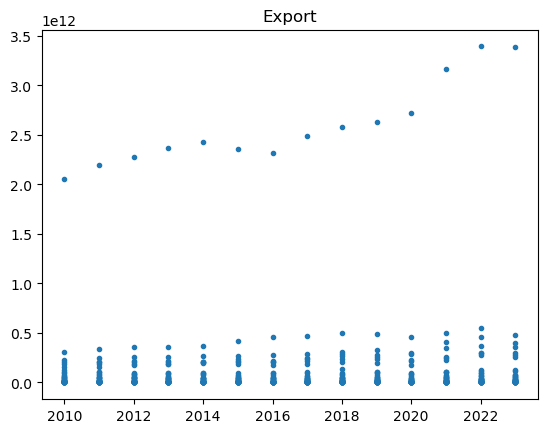

In [77]:
variable = 'Export'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [78]:
df[df[variable]>20000000000].index.unique()

Index(['DZA', 'ARG', 'AZE', 'BLR', 'BRA', 'CHN', 'COL', 'CRI', 'DOM', 'ECU',
       'IDN', 'IRN', 'KAZ', 'LBY', 'MYS', 'MEX', 'PER', 'SRB', 'ZAF', 'THA',
       'TUR', 'UKR'],
      dtype='object', name='Country Code')

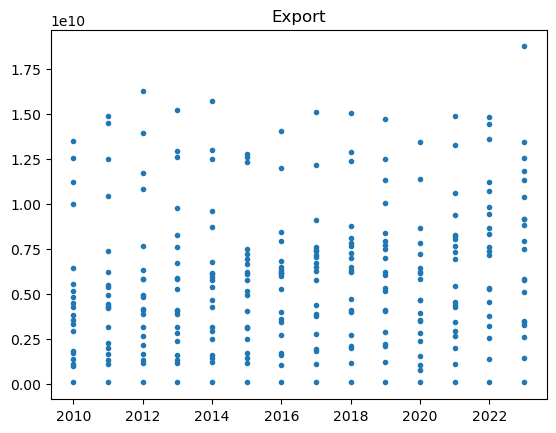

In [79]:
for i in ['CHN', 'MEX', 'BRA', 'THA', 'TUR', 'IDN', 'MYS', 'IRN', 'ARG', 'KAZ', 'ZAF', 'DZA', 'COL', 'LBY', 'PER', 'UKR', 'BLR', 'AZE', 'ECU', 'SRB', 'CRI', 'DOM']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

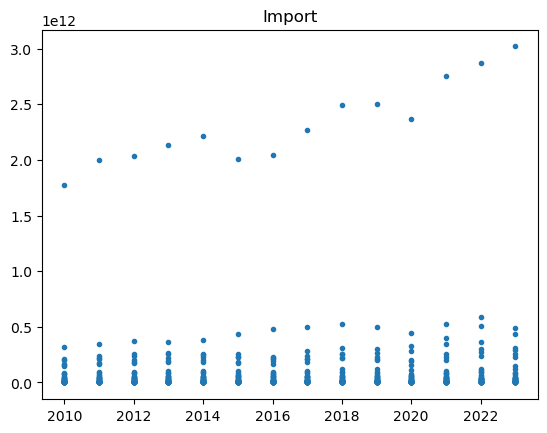

In [80]:
variable = 'Import'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [81]:
df[df[variable]>30000000000].index.unique()

Index(['DZA', 'ARG', 'BLR', 'BRA', 'CHN', 'COL', 'DOM', 'ECU', 'IDN', 'IRN',
       'KAZ', 'LBY', 'MYS', 'MEX', 'PER', 'SRB', 'ZAF', 'THA', 'TUR', 'UKR'],
      dtype='object', name='Country Code')

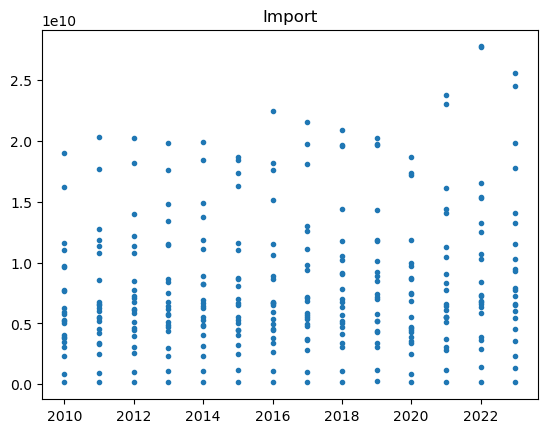

In [82]:
for i in ['CHN', 'MEX', 'TUR', 'BRA', 'IDN', 'MYS', 'THA', 'ARG', 'COL', 'IRN', 'ZAF', 'DZA', 'BLR', 'KAZ', 'PER', 'UKR', 'DOM', 'ECU', 'LBY', 'SRB']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

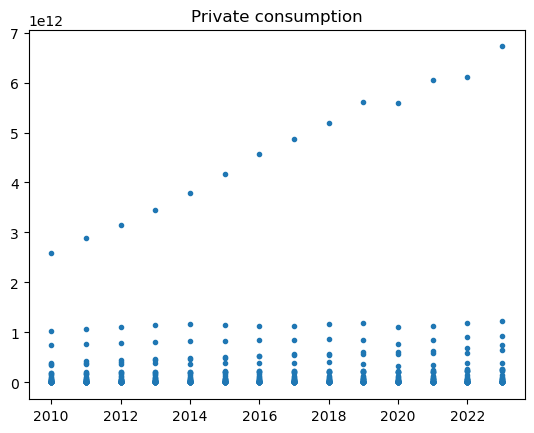

In [83]:
variable = 'Private consumption'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [84]:
df[df[variable]>45000000000].index.unique()

Index(['DZA', 'ARG', 'BRA', 'CHN', 'COL', 'CRI', 'DOM', 'ECU', 'GTM', 'IDN',
       'IRN', 'KAZ', 'MYS', 'MEX', 'PER', 'ZAF', 'THA', 'TUR', 'UKR'],
      dtype='object', name='Country Code')

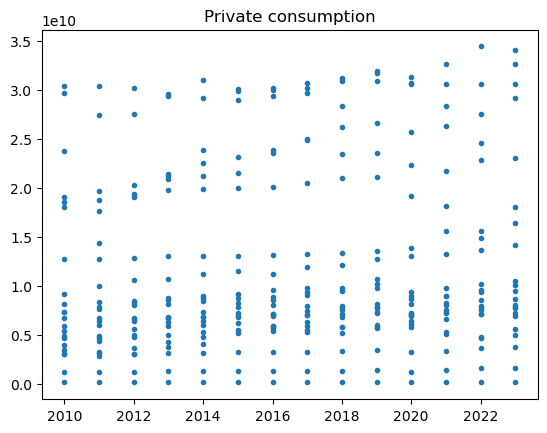

In [85]:
for i in ['CHN', 'ARG', 'BRA', 'IDN', 'MEX', 'TUR', 'COL', 'IRN', 'MYS', 'ZAF', 'THA', 'KAZ', 'PER', 'DZA', 'CRI', 'DOM', 'ECU', 'GTM', 'UKR']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

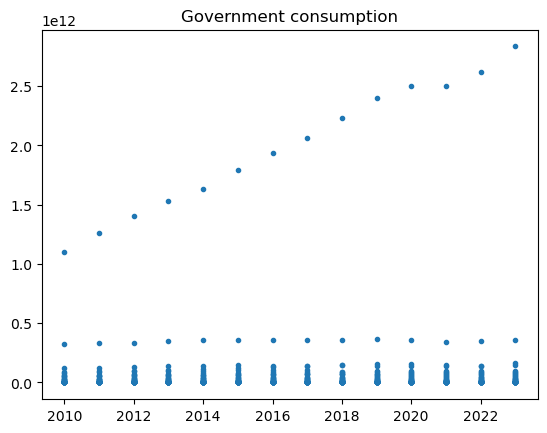

In [86]:
variable = 'Government consumption'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [87]:
df[df[variable]>13000000000].index.unique()

Index(['DZA', 'ARG', 'BRA', 'CHN', 'COL', 'ECU', 'IDN', 'IRN', 'KAZ', 'LBY',
       'MYS', 'MEX', 'PER', 'ZAF', 'THA', 'TUR', 'UKR'],
      dtype='object', name='Country Code')

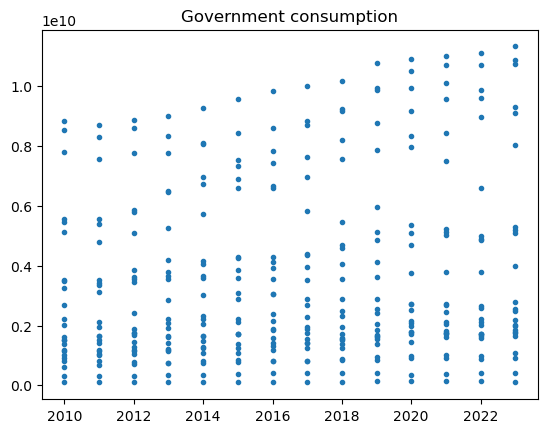

In [88]:
for i in ['BRA', 'CHN', 'ARG', 'MEX', 'TUR', 'IDN', 'IRN', 'ZAF', 'THA', 'DZA', 'COL', 'MYS', 'PER', 'UKR', 'ECU', 'KAZ', 'LBY']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

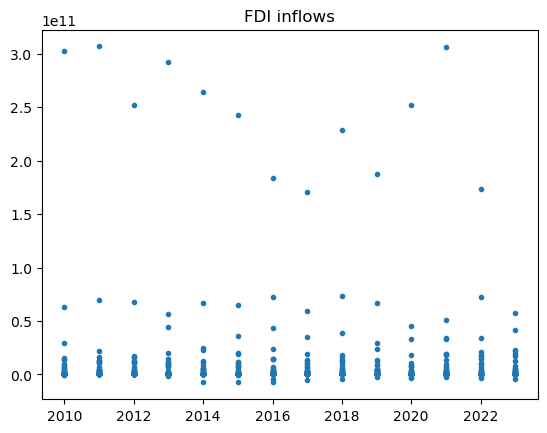

In [89]:
variable = 'FDI inflows'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [90]:
df[df[variable]>1300000000].index.unique()

Index(['DZA', 'ARG', 'AZE', 'BLR', 'BRA', 'CHN', 'COL', 'CRI', 'DOM', 'ECU',
       'GEO', 'GTM', 'IDN', 'IRQ', 'KAZ', 'LBY', 'MYS', 'MEX', 'MNG', 'NAM',
       'PER', 'SRB', 'ZAF', 'THA', 'TUR', 'UKR'],
      dtype='object', name='Country Code')

In [91]:
df[df[variable]<-100000000].index.unique()

Index(['DZA', 'AZE', 'BWA', 'SLV', 'IRQ', 'LBY', 'MNG', 'NAM', 'SUR', 'THA',
       'UKR'],
      dtype='object', name='Country Code')

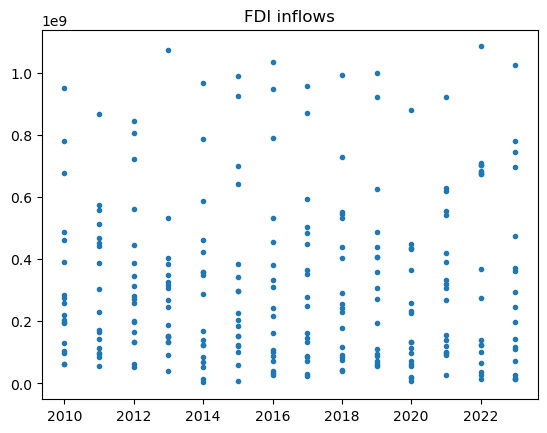

In [92]:
for i in ['CHN', 'BRA', 'MEX', 'ZAF', 'ARG', 'COL', 'IDN', 'KAZ', 'MYS', 'THA', 'TUR', 'AZE', 'PER', 'UKR', 'IRQ', 'MNG', 'DZA', 'BLR', 'CRI', 'DOM', 'GTM', 'LBY', 'NAM', 'SRB', 'ECU', 'GEO', 'BWA', 'SLV', 'SUR']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

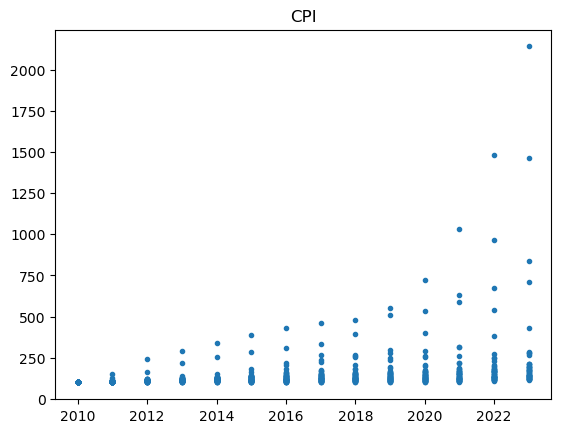

In [93]:
variable = 'CPI'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [94]:
df[df[variable]>250].index.unique()

Index(['BLR', 'IRN', 'KAZ', 'LBY', 'MDA', 'MNG', 'SUR', 'TUR', 'UKR'], dtype='object', name='Country Code')

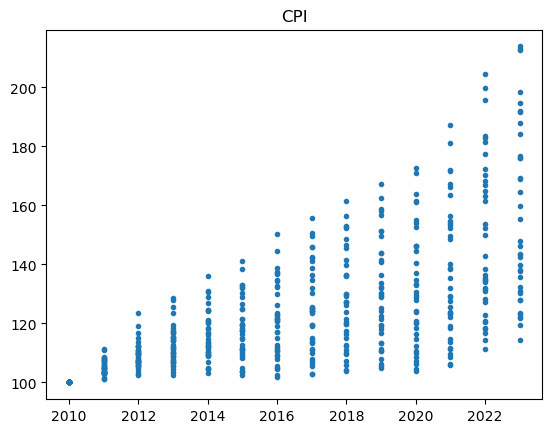

In [95]:
for i in ['BLR', 'IRN', 'SUR', 'TUR', 'KAZ', 'LBY', 'MDA', 'MNG', 'UKR']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

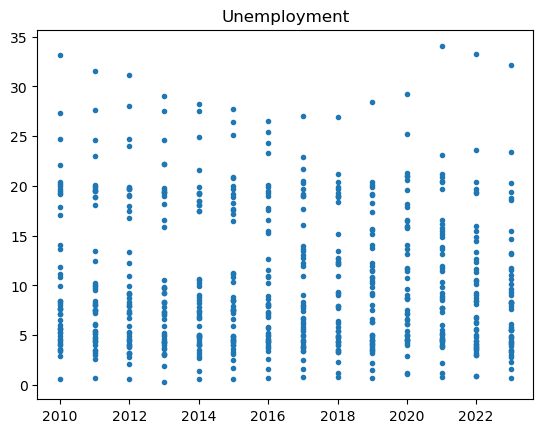

In [96]:
variable = 'Unemployment'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [97]:
df[df[variable]>25].index.unique()

Index(['BIH', 'MKD', 'ZAF', 'LCA'], dtype='object', name='Country Code')

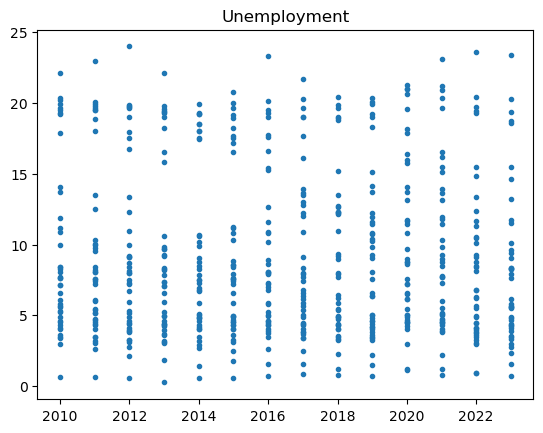

In [98]:
for i in ['BIH', 'MKD', 'ZAF', 'LCA']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

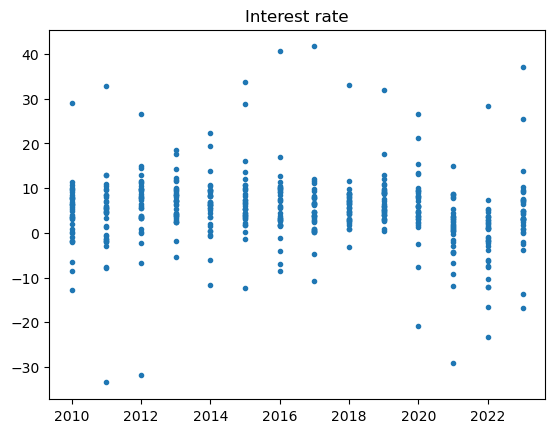

In [99]:
variable = 'Interest rate'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [100]:
df[df[variable]>20].index.unique()

Index(['AZE', 'BRA'], dtype='object', name='Country Code')

In [101]:
df[df[variable]<-10].index.unique()

Index(['DZA', 'ARG', 'AZE', 'BLR', 'MDA', 'SUR', 'UKR'], dtype='object', name='Country Code')

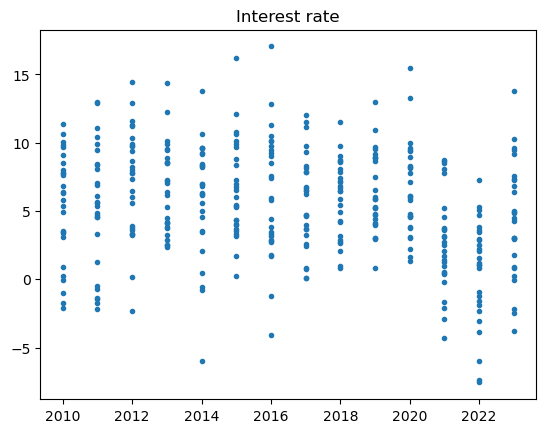

In [102]:
for i in ['AZE', 'BRA', 'BLR', 'SUR', 'DZA', 'ARG', 'MDA', 'UKR']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

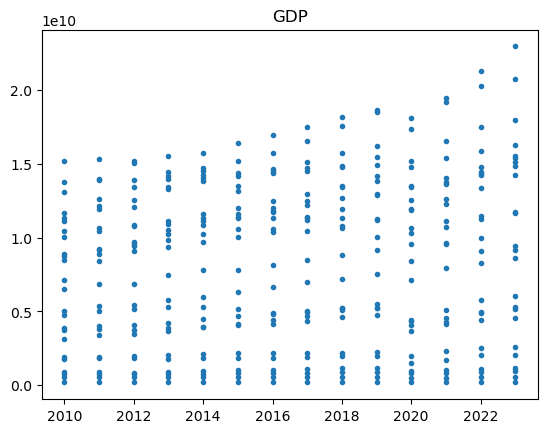

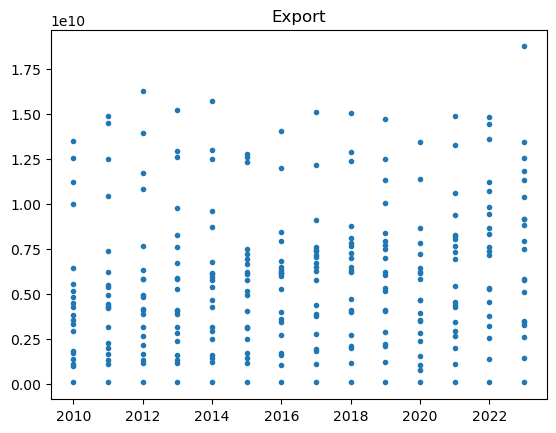

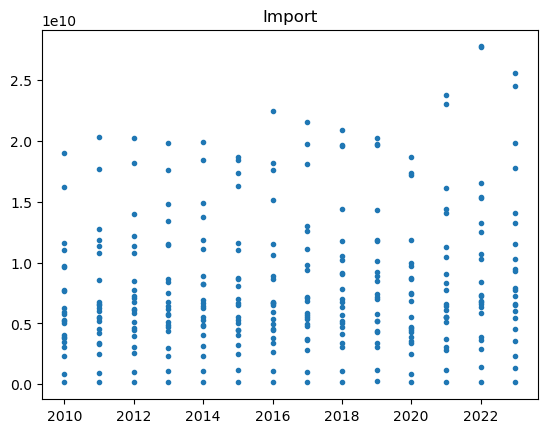

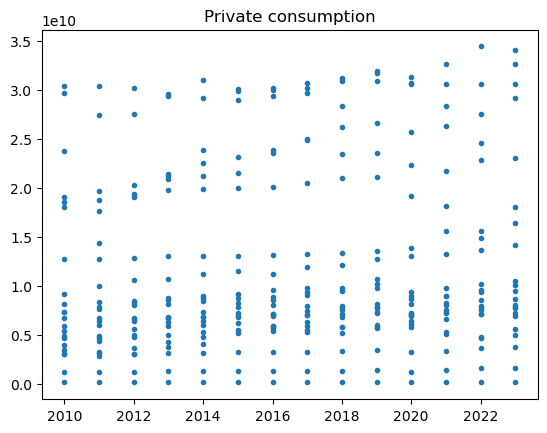

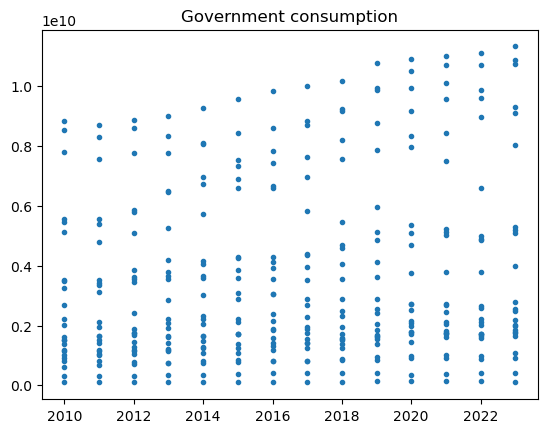

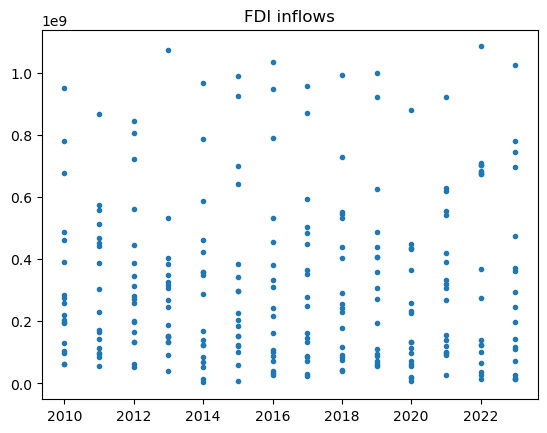

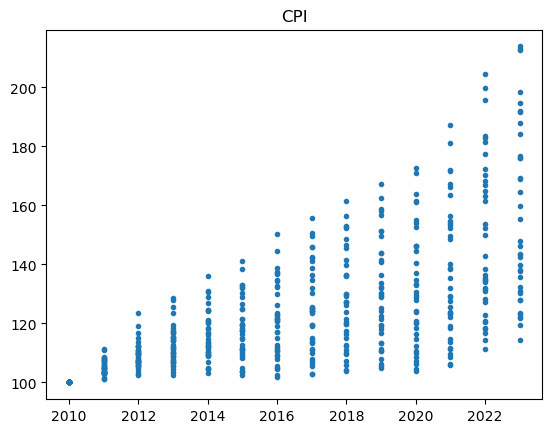

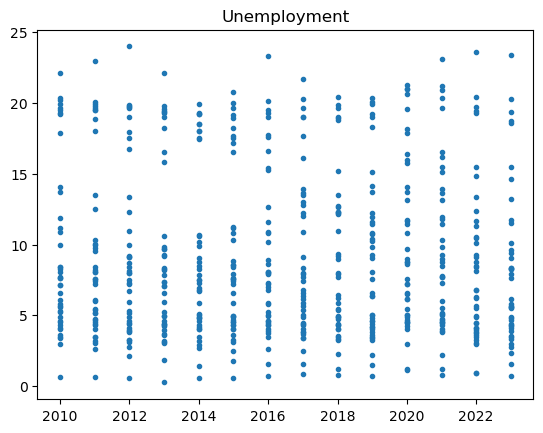

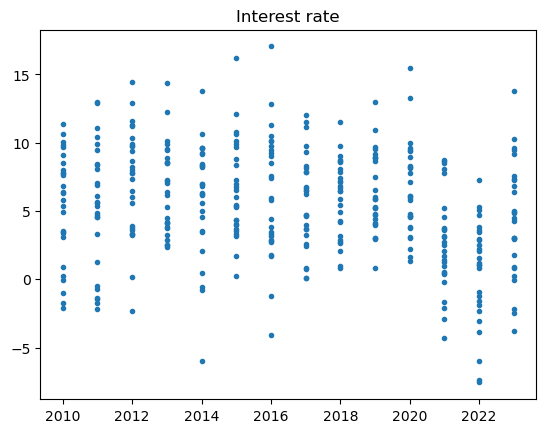

In [103]:
for i in df.columns[2:]:
    plt.scatter(x=df['Time'], y=df[i], marker='.')
    plt.title(i)
    plt.show()

#### Der behandelte Datensatz wird gespeichert.

In [104]:
df_upper_middle = df.copy()
df_upper_middle.to_csv('df_upper_middle.csv')
print('df_upper_middle saved')

df_upper_middle saved


## 'High income countries' Datensatz

In [105]:
df = pd.read_excel('high_income.xls')
df.head()

,Country Name,Country Code,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
0,Antigua and Barbuda,ATG,2010,1.376434e+09,NaN,NaN,NaN,NaN,7.219116,100.000000,NaN,9.245397
1,Antigua and Barbuda,ATG,2011,1.349474e+09,NaN,NaN,NaN,NaN,5.434250,103.456750,NaN,10.177754
2,Antigua and Barbuda,ATG,2012,1.394989e+09,NaN,NaN,NaN,NaN,9.406409,106.950360,NaN,9.945285
3,Antigua and Barbuda,ATG,2013,1.386610e+09,NaN,NaN,NaN,NaN,7.007965,108.083497,NaN,9.430504
4,Antigua and Barbuda,ATG,2014,1.417274e+09,NaN,NaN,NaN,NaN,3.355244,109.261004,NaN,8.148533


In [106]:
df.set_index('Country Code', inplace=True)

In [107]:
for i in df.columns[3:8]:
    df[i] = df['GDP'] * df[i]/100
df.head()

,Country Name,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
Country Code,,,,,,,,,,,
ATG,Antigua and Barbuda,2010,1.376434e+09,NaN,NaN,NaN,NaN,9.936640e+07,100.000000,NaN,9.245397
ATG,Antigua and Barbuda,2011,1.349474e+09,NaN,NaN,NaN,NaN,7.333378e+07,103.456750,NaN,10.177754
ATG,Antigua and Barbuda,2012,1.394989e+09,NaN,NaN,NaN,NaN,1.312184e+08,106.950360,NaN,9.945285
ATG,Antigua and Barbuda,2013,1.386610e+09,NaN,NaN,NaN,NaN,9.717311e+07,108.083497,NaN,9.430504
ATG,Antigua and Barbuda,2014,1.417274e+09,NaN,NaN,NaN,NaN,4.755300e+07,109.261004,NaN,8.148533


<Axes: ylabel='Country Code'>

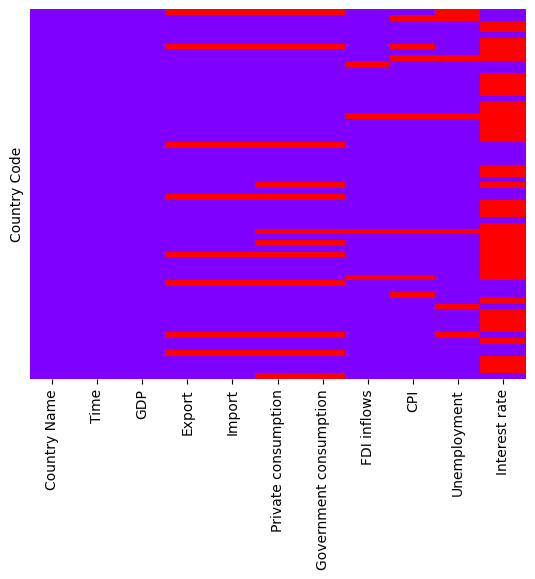

In [108]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='rainbow')

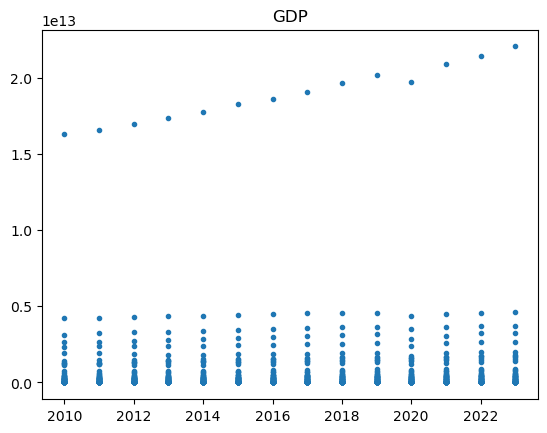

In [109]:
variable = 'GDP'
    
plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [110]:
df[df[variable]>700000000000].index.unique()

Index(['AUS', 'CAN', 'FRA', 'DEU', 'ITA', 'JPN', 'KOR', 'NLD', 'RUS', 'SAU',
       'ESP', 'CHE', 'GBR', 'USA'],
      dtype='object', name='Country Code')

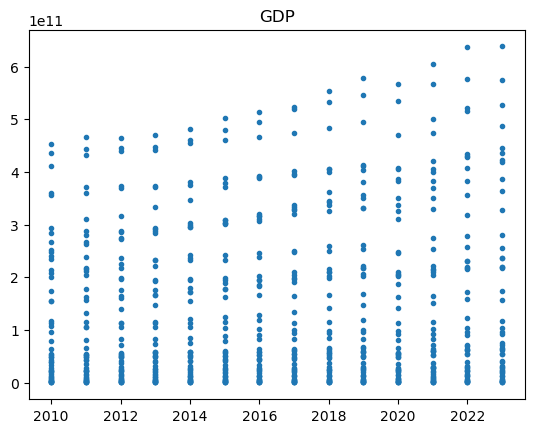

In [111]:
for i in ['USA', 'FRA', 'DEU', 'ITA', 'JPN', 'GBR', 'AUS', 'CAN', 'KOR', 'RUS', 'ESP', 'NLD', 'SAU', 'CHE']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

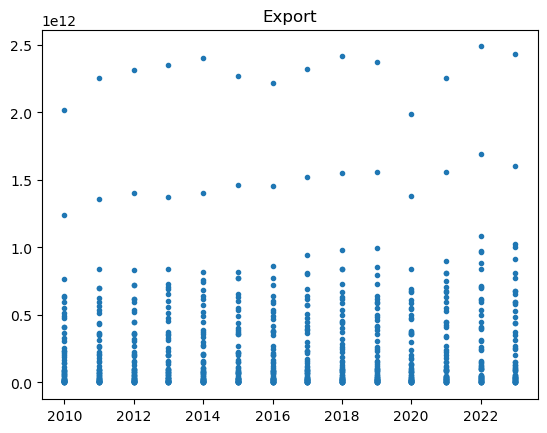

In [112]:
variable = 'Export'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [113]:
df[df[variable]>1200000000000].index.unique()

Index(['DEU', 'USA'], dtype='object', name='Country Code')

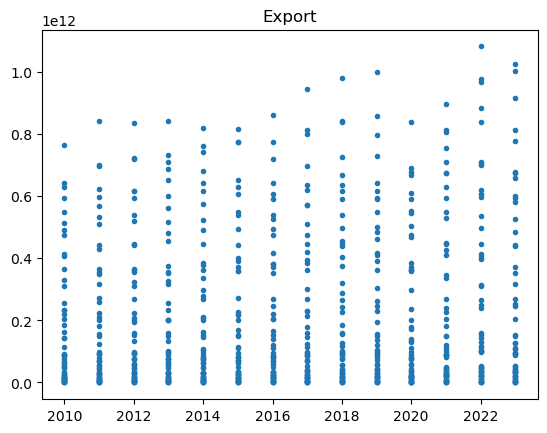

In [114]:
for i in ['DEU', 'USA']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

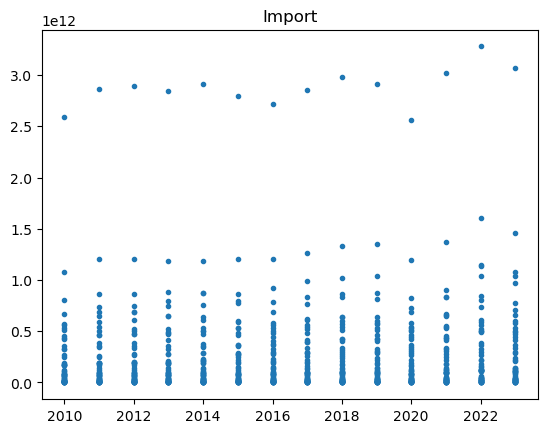

In [115]:
variable = 'Import'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [116]:
df[df[variable]>1500000000000].index.unique()

Index(['DEU', 'USA'], dtype='object', name='Country Code')

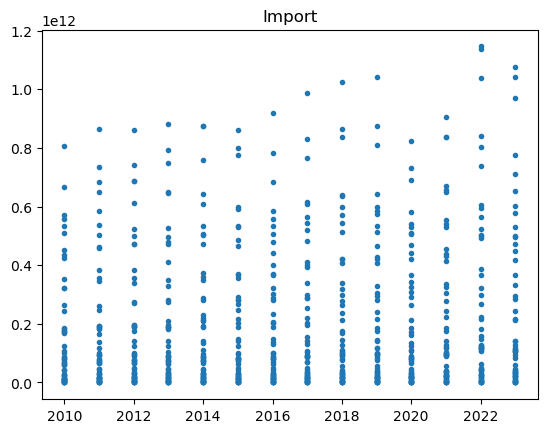

In [117]:
for i in ['DEU', 'USA']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

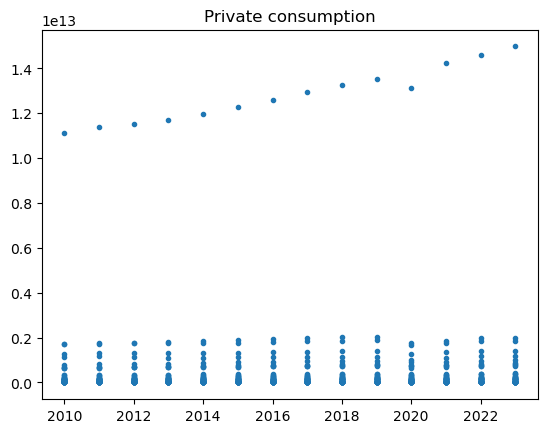

In [118]:
variable = 'Private consumption'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [119]:
df[df[variable]>500000000000].index.unique()

Index(['AUS', 'CAN', 'FRA', 'DEU', 'ITA', 'KOR', 'RUS', 'ESP', 'GBR', 'USA'], dtype='object', name='Country Code')

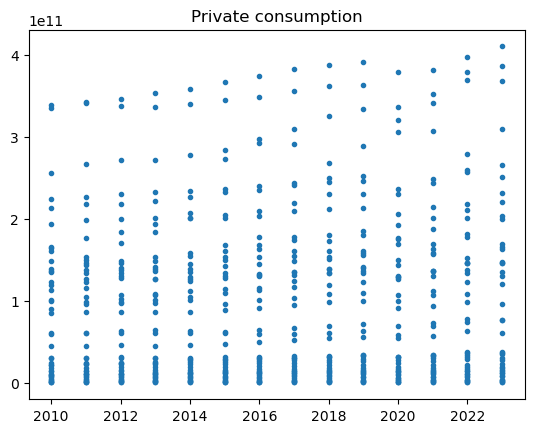

In [120]:
for i in ['USA', 'DEU', 'GBR', 'AUS', 'CAN', 'FRA', 'ITA', 'KOR', 'RUS', 'ESP']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

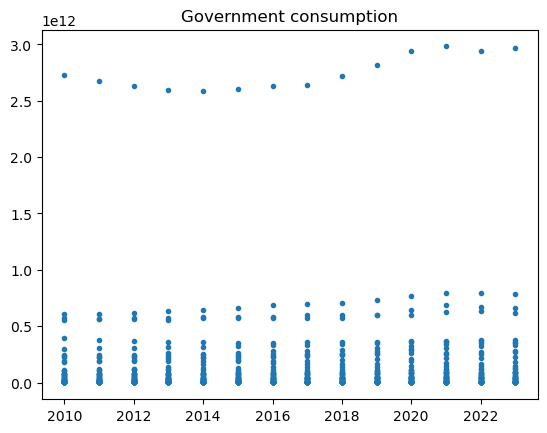

In [121]:
variable = 'Government consumption'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [122]:
df[df[variable]>360000000000].index.unique()

Index(['CAN', 'FRA', 'DEU', 'ITA', 'GBR', 'USA'], dtype='object', name='Country Code')

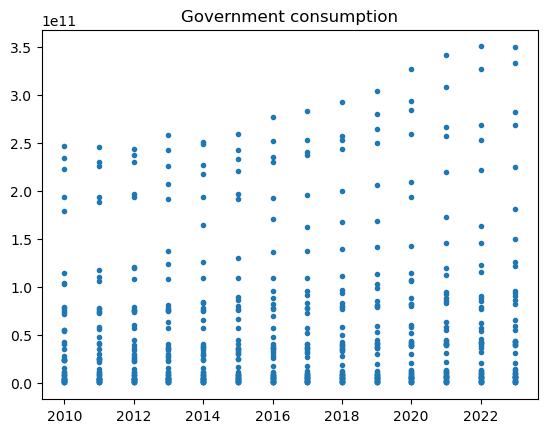

In [123]:
for i in ['USA', 'FRA', 'DEU', 'GBR', 'CAN', 'ITA']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

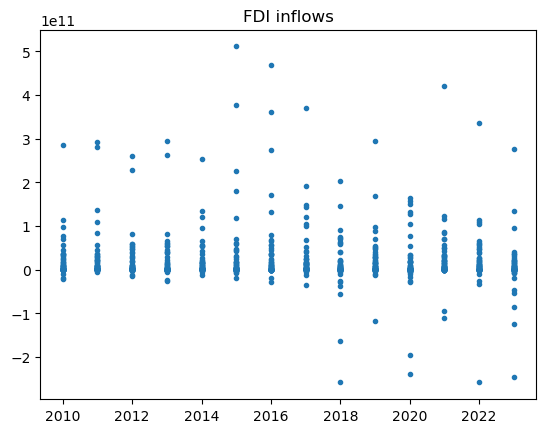

In [124]:
variable = 'FDI inflows'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [125]:
df[df[variable]>100000000000].index.unique()

Index(['BEL', 'FRA', 'DEU', 'HKG', 'HUN', 'IRL', 'LUX', 'NLD', 'SGP', 'CHE',
       'GBR', 'USA'],
      dtype='object', name='Country Code')

In [126]:
df[df[variable]<-50000000000].index.unique()

Index(['HUN', 'IRL', 'LUX', 'NLD', 'CHE', 'GBR'], dtype='object', name='Country Code')

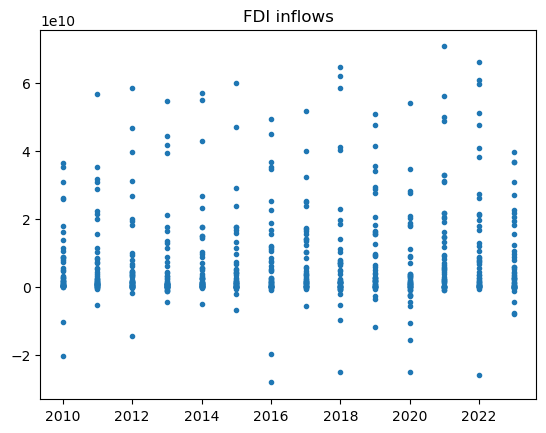

In [127]:
for i in ['IRL', 'NLD', 'GBR', 'USA', 'HUN', 'LUX', 'CHE', 'DEU', 'HKG', 'BEL', 'FRA', 'SGP']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

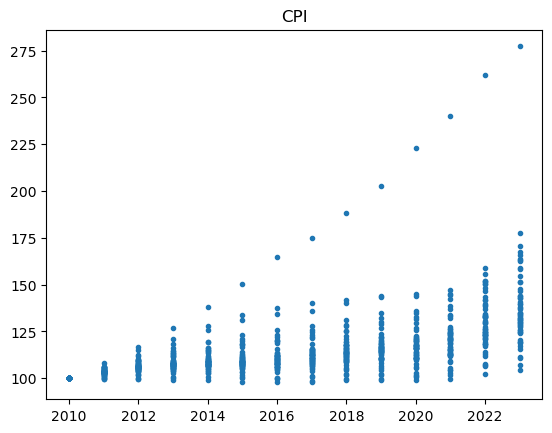

In [128]:
variable = 'CPI'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [129]:
df[df[variable]>200].index.unique()

Index(['URY'], dtype='object', name='Country Code')

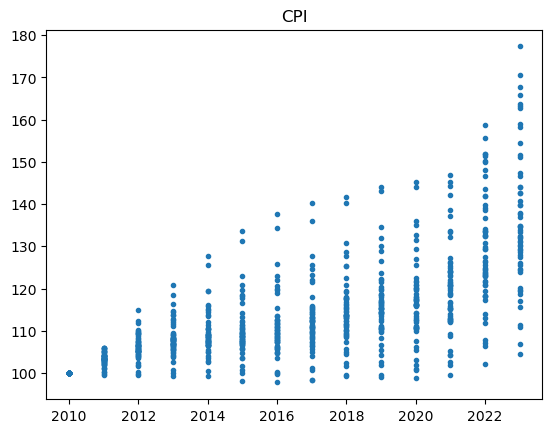

In [130]:
for i in ['URY']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

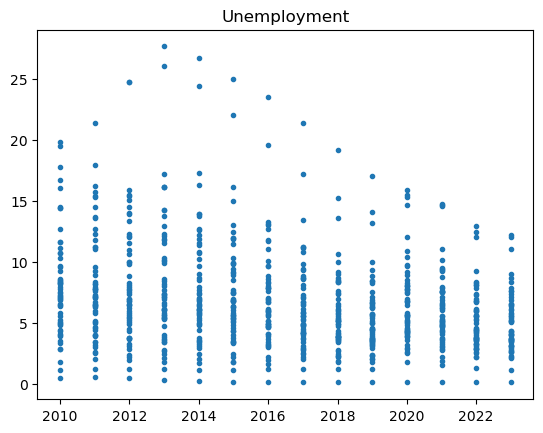

In [131]:
variable = 'Unemployment'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [132]:
df[df[variable]>20].index.unique()

Index(['GRC', 'ESP'], dtype='object', name='Country Code')

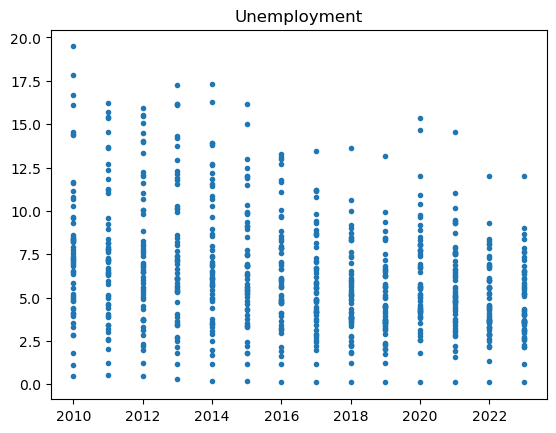

In [133]:
for i in ['GRC', 'ESP']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

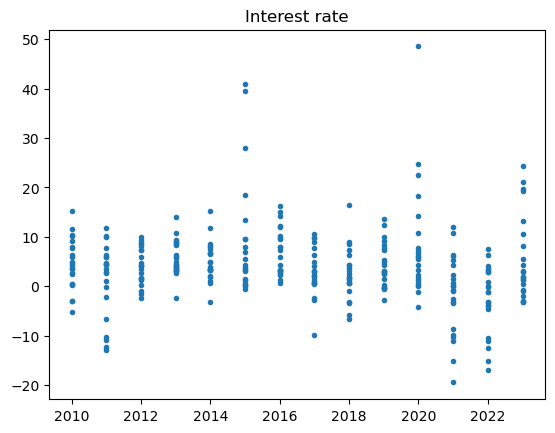

In [134]:
variable = 'Interest rate'

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

In [135]:
df[df[variable]>11].index.unique()

Index(['ABW', 'BRN', 'GUY', 'KWT', 'QAT', 'SYC', 'KNA', 'TTO'], dtype='object', name='Country Code')

In [136]:
df[df[variable]<-6].index.unique()

Index(['BRN', 'BGR', 'GUY', 'KWT', 'QAT', 'RUS', 'TTO'], dtype='object', name='Country Code')

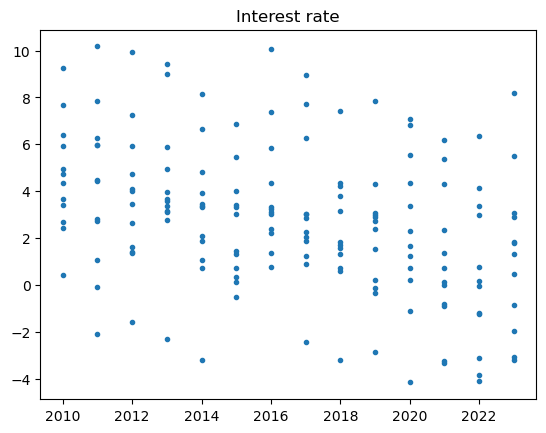

In [137]:
for i in ['GUY', 'KWT', 'QAT', 'BRN', 'BGR', 'RUS', 'TTO', 'BRB', 'SYC', 'KNA', 'ABW']:
    df.loc[i, variable]= np.nan

plt.scatter(x=df['Time'], y=df[variable], marker='.')
plt.title(variable)
plt.show()

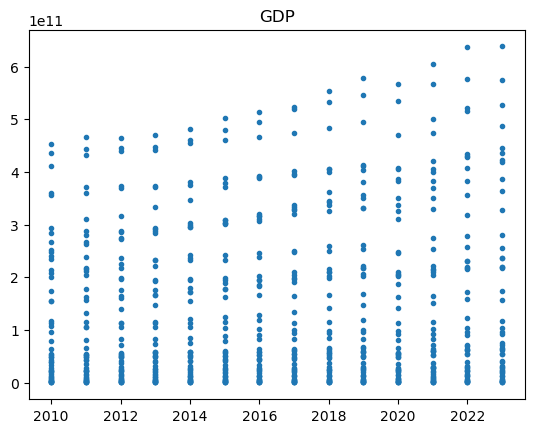

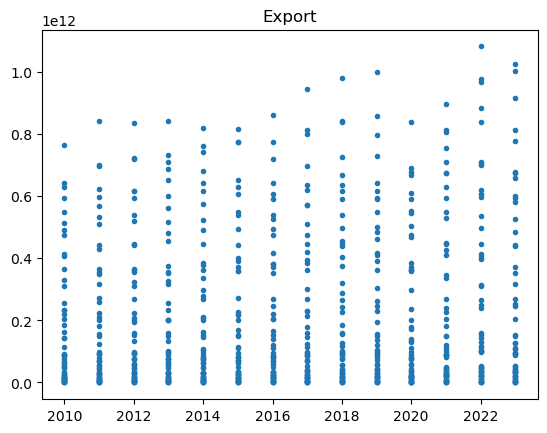

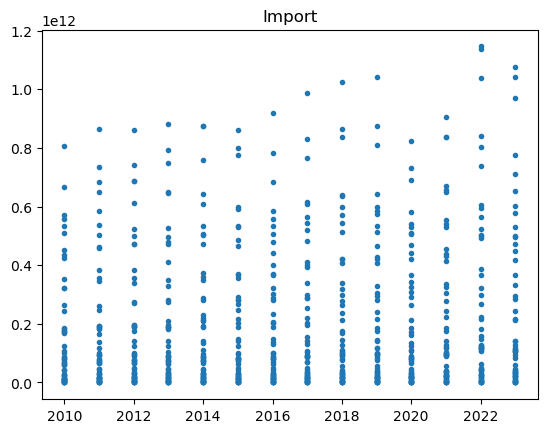

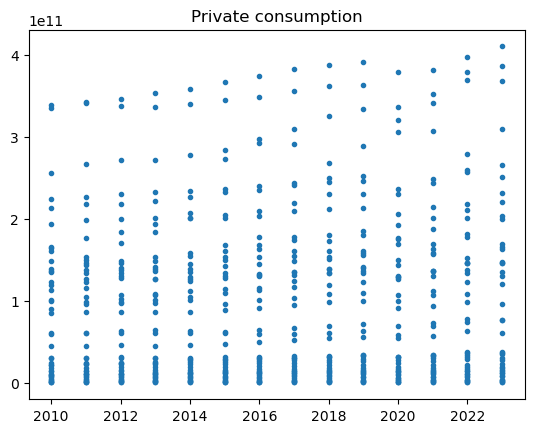

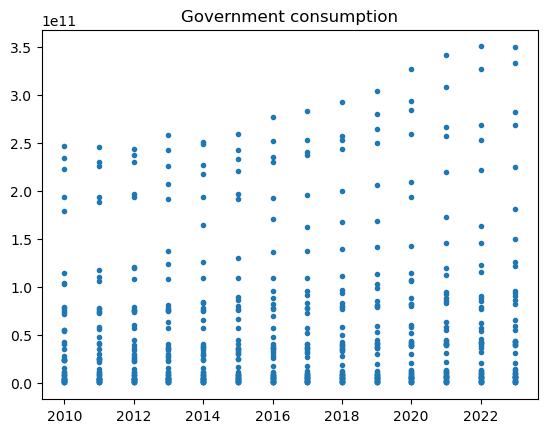

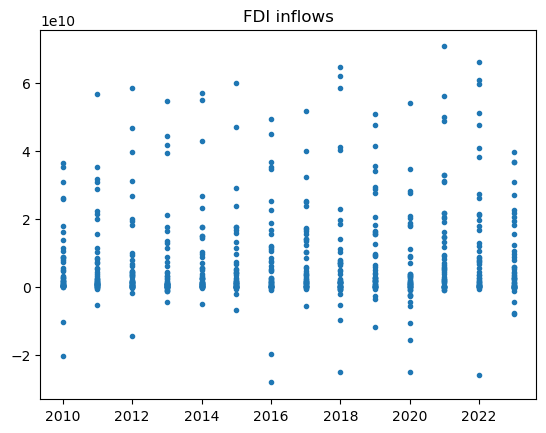

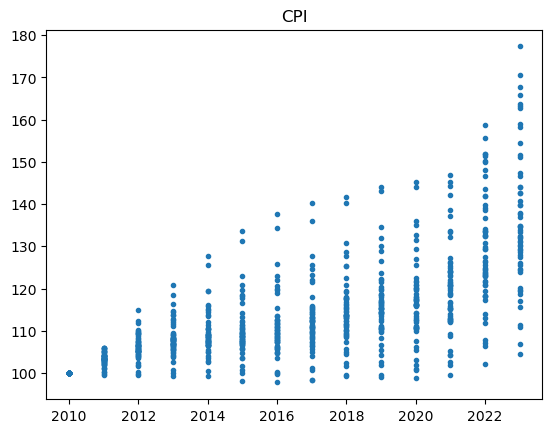

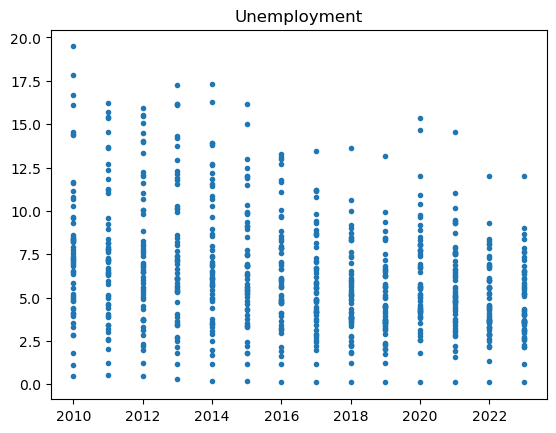

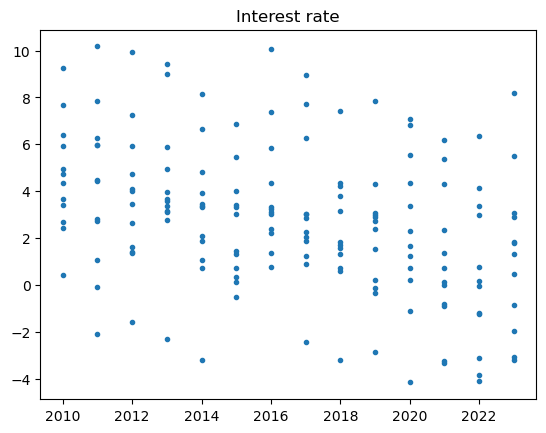

In [138]:
for i in df.columns[2:]:
    plt.scatter(x=df['Time'], y=df[i], marker='.')
    plt.title(i)
    plt.show()

#### Der behandelte Datensatz wird gespeichert.

In [139]:
df_high = df.copy()
df_high.to_csv('df_high.csv')
print('df_high saved')

df_high saved
